### Problem Statement:


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### We will do this project in two phase
### Prediction -  Primary Fuel(Classification)
### Prediction -  capacity_mw(Regression)

.

.

# Prediction - Primary Fuel(Classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
powr=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
powr.head(5)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [3]:
powr.shape

(907, 27)

In [4]:
powr.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
powr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
powr.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
powr.isnull().sum()   

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

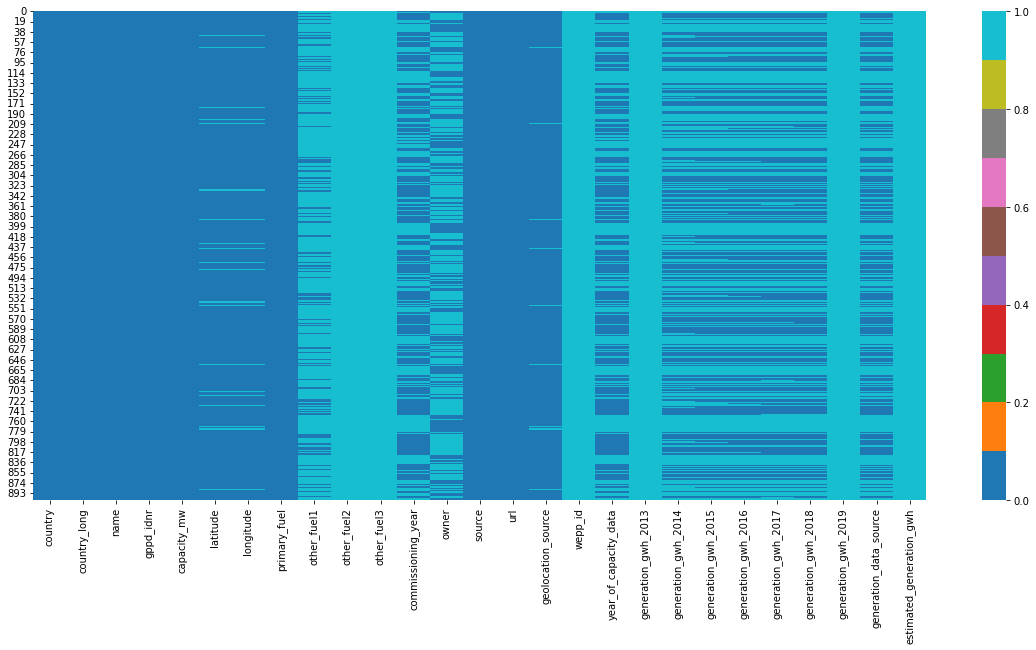

In [8]:
plt.figure(figsize=[20,9])
sns.heatmap(powr.isnull(),cmap='tab10')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is 907*27 i.e. no. of rows are 907 and no. of columns are 27(including target).

2) Out of 27 columns 15 columns are continuous in nature and rest 12 are object type.

3) Null values are present in the data set as we can see in ths seaborn heatmap, 6 columns are fully null means there is not any data, So we will drop these columns.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

5) Some columns has null values and data as well, SO in this condition we will use imputation technique.

#### Setting the target column

In [9]:
powr['Target_primary_fuel']=powr['primary_fuel']

In [10]:
powr.drop(['primary_fuel'],axis=1,inplace=True)

In [11]:
powr.sample(4)

country country_long                       name   gppd_idnr  capacity_mw  \
780     IND        India  Surajbari Creek Wind Farm  WRI1026087         30.0   
316     IND        India                    KALLADA  IND0000177         15.0   
660     IND        India    Raksa Solar Power Plant  WRI1026190          2.0   
105     IND        India             BRAMHAPURAM DG  IND0000067         60.0   

     latitude  longitude other_fuel1 other_fuel2  other_fuel3  ...  \
780   23.3232    70.6417         NaN         NaN          NaN  ...   
316    8.9553    77.0697         NaN         NaN          NaN  ...   
660   25.4106    78.4805         NaN         NaN          NaN  ...   
105    9.9975    76.3744         NaN         NaN          NaN  ...   

     generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
780                  NaN                 NaN                 NaN   
316                  NaN                 NaN                 NaN   
660                  NaN                 NaN                 NaN   
105                  NaN              8.1158             12.8899   

    generation_gwh_2016 generation_gwh_2017  generation_gwh_2018  \
780                 NaN                 NaN                  NaN   
316                 NaN                 NaN                  NaN   
660                 NaN                 NaN                  NaN   
105              5.1171            0.425769              0.26376   

     generation_gwh_2019         generation_data_source  \
780                  NaN                            NaN   
316                  NaN                            NaN   
660                  NaN                            NaN   
105                  NaN  Central Electricity Authority   

     estimated_generation_gwh  Target_primary_fuel  
780                       NaN                 Wind  
316                       NaN                Hydro  
660                       NaN                Solar  
105                       NaN                  Oil  

[4 rows x 27 columns]

### Dropping some columns

##### We are droping some columns like 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh' and 'other_fuel3'

##### columns because these columns have not any data, That is why these columns are not important for our model.

In [12]:
drp_cl=['wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 'other_fuel3','other_fuel2']

In [13]:
for i in drp_cl:
    powr.drop([i],axis=1,inplace=True)

In [14]:
powr.shape

(907, 21)

### Adopting imputation technique

#### So We can see in the heatmap our data frame contain so many null values, this will create the problem for analyzing and Visualization of data. To deal with this we will use imputation technique to fill these null values. 

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
si=SimpleImputer(strategy='most_frequent')

In [17]:
null=['latitude','longitude','other_fuel1','commissioning_year','owner','geolocation_source','year_of_capacity_data',
'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
 'generation_gwh_2017','generation_gwh_2018','generation_data_source']

In [18]:
for i in null:
    powr[i]=si.fit_transform(powr[i].values.reshape(-1,1))

In [19]:
powr.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
Target_primary_fuel       0
dtype: int64

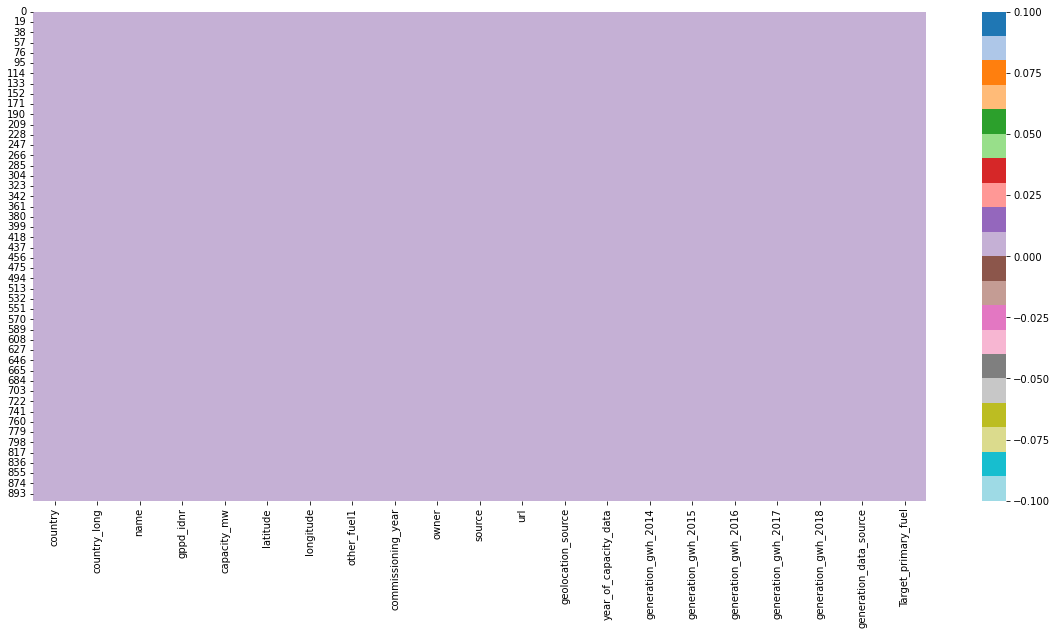

In [20]:
plt.figure(figsize=[20,9])
sns.heatmap(powr.isnull(),cmap='tab20_r')
plt.show()

### Observation-2

1) We have set the target column in the last of the data set, So it became easy to understand.

2) In order to filter our data set we dropped some columns becasue these columns have null values instead of data.

3) We used imputation technique for filling the null values.

As we can see in the seaborn heatmap now we do not have null values.


# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

IND    907
Name: country, dtype: int64


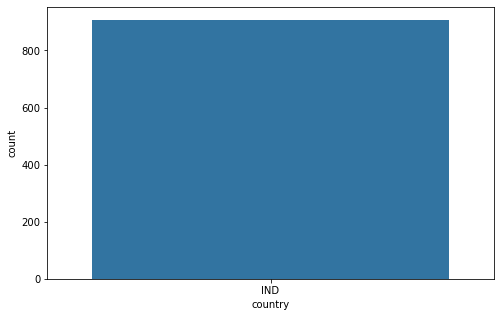

In [21]:
print(powr['country'].value_counts())
plt.figure(figsize=[8,5])
sns.countplot(powr['country'])
plt.show()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Target_primary_fuel, dtype: int64


<AxesSubplot:ylabel='Target_primary_fuel'>

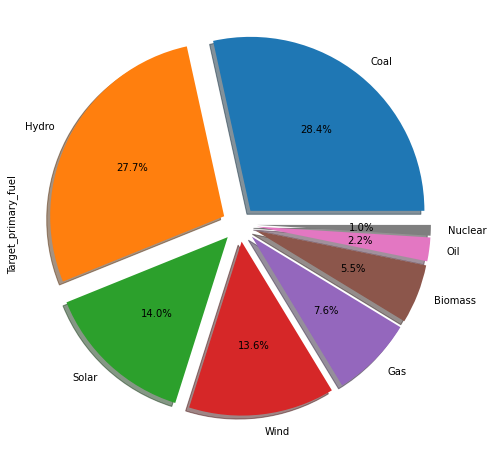

In [22]:
print(powr['Target_primary_fuel'].value_counts())
powr.Target_primary_fuel.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(8,8))

India    907
Name: country_long, dtype: int64


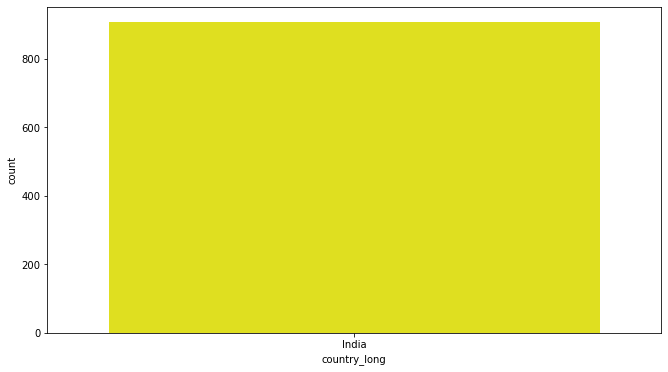

In [23]:
print(powr['country_long'].value_counts())
plt.figure(figsize=[11,6])
sns.countplot(powr['country_long'],color='yellow')
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


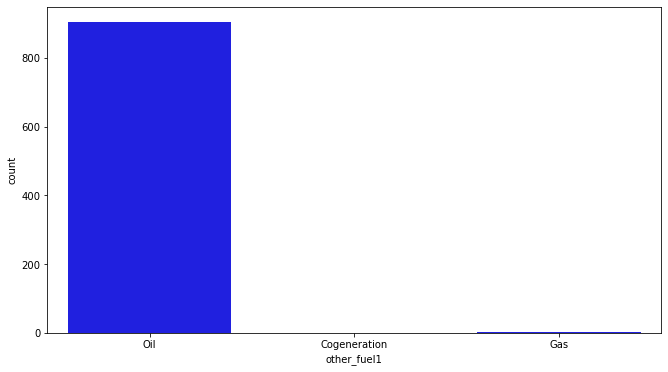

In [24]:
print(powr['other_fuel1'].value_counts())
plt.figure(figsize=[11,6])
sns.countplot(powr['other_fuel1'],color='b')
plt.show()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64


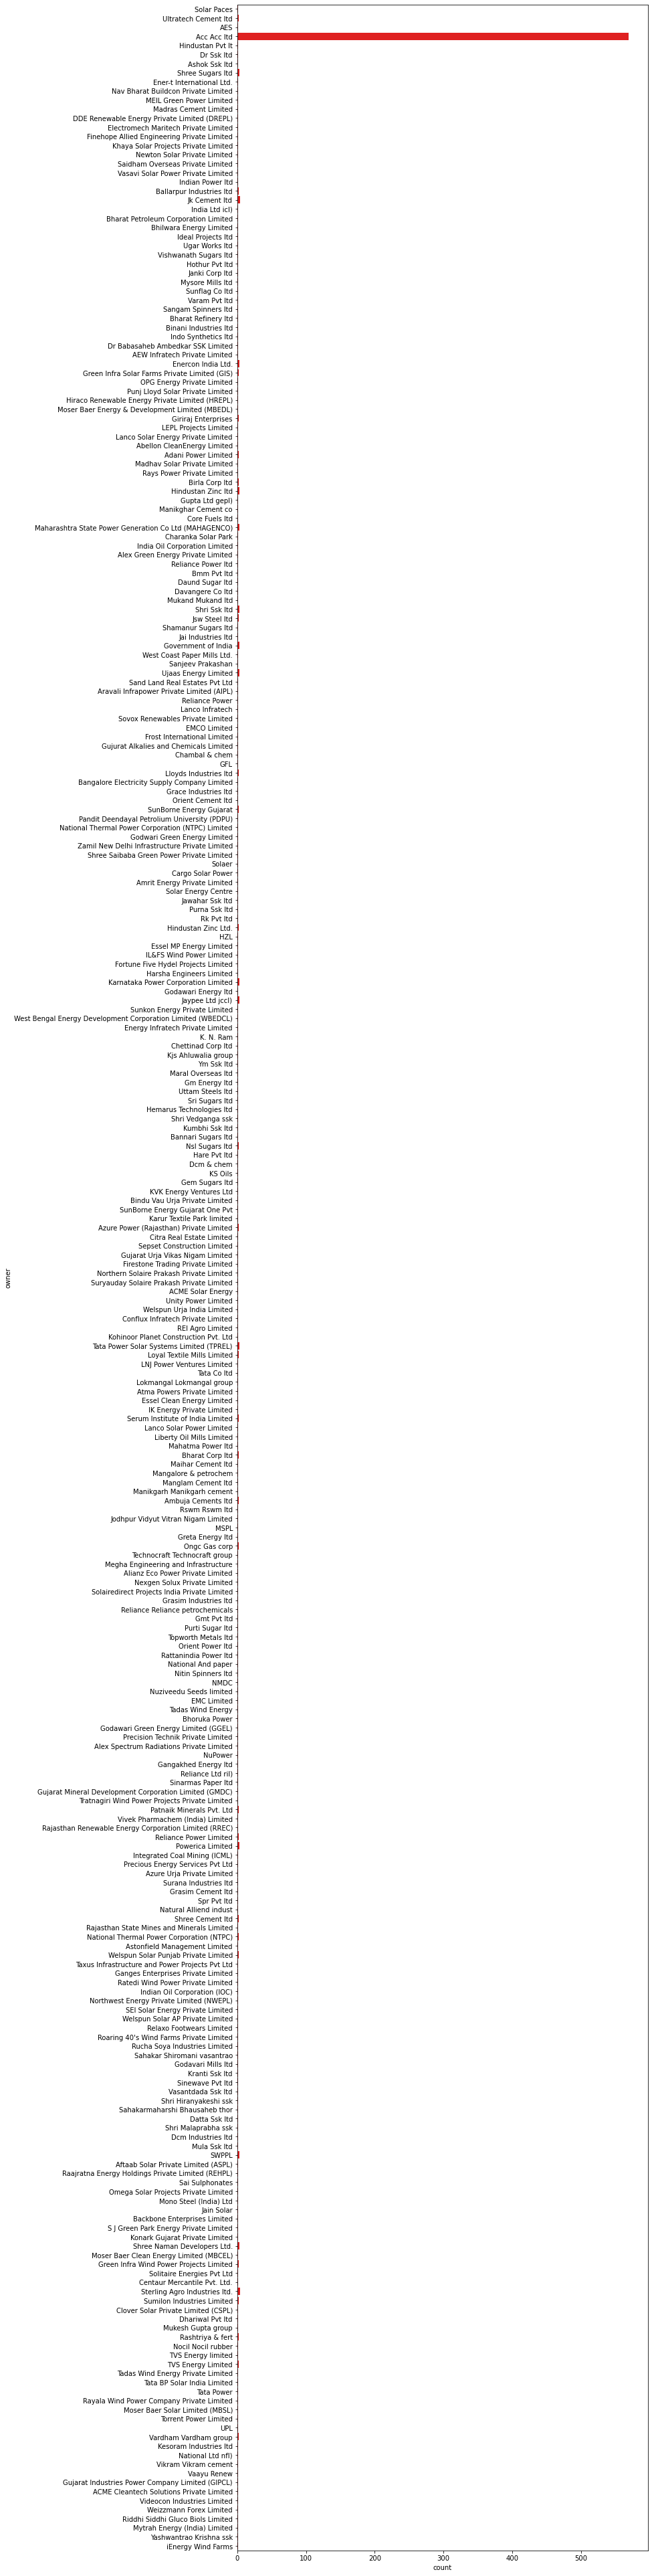

In [25]:
print(powr['owner'].value_counts())
plt.figure(figsize=[11,70])
sns.countplot(y=powr['owner'],color='r')
plt.show()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


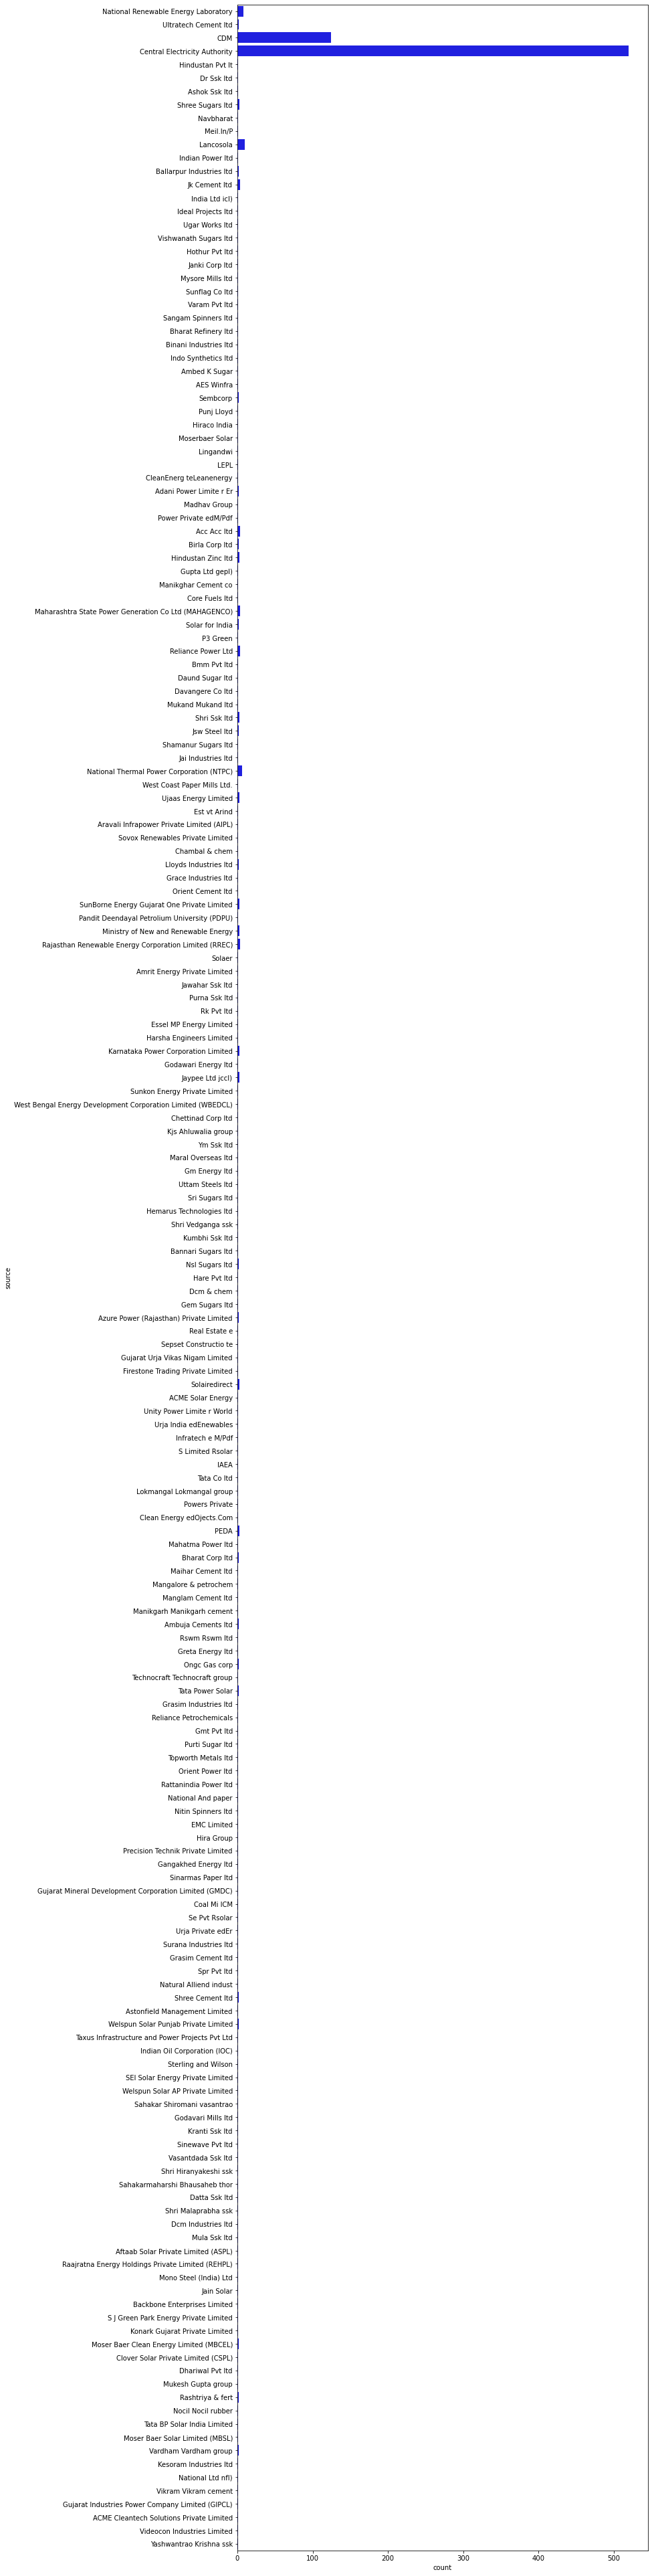

In [26]:
print(powr['source'].value_counts())
plt.figure(figsize=[11,70])
sns.countplot(y=powr['source'],color='b')
plt.show()

In [27]:
print(powr['url'].value_counts())

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


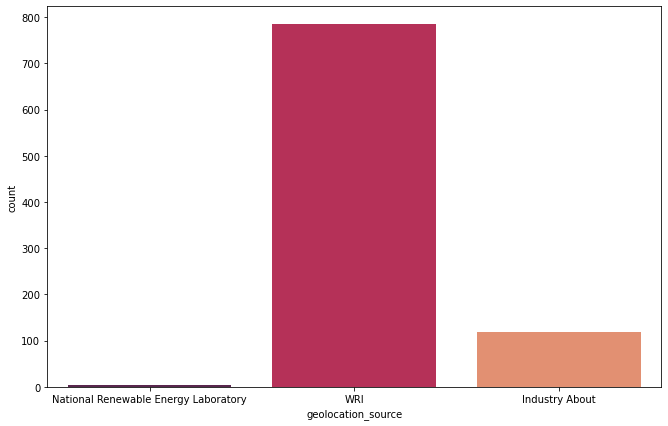

In [28]:
print(powr['geolocation_source'].value_counts())
plt.figure(figsize=[11,7])
sns.countplot(powr['geolocation_source'],palette="rocket")
plt.show()

Central Electricity Authority    907
Name: generation_data_source, dtype: int64


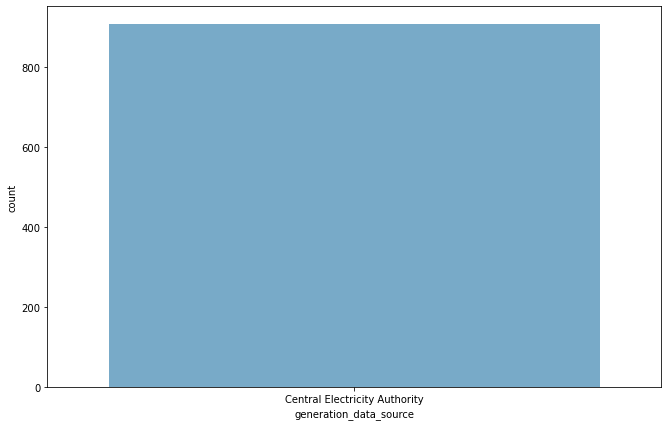

In [29]:
print(powr['generation_data_source'].value_counts())
plt.figure(figsize=[11,7])
sns.countplot(powr['generation_data_source'],palette="Blues")
plt.show()

<AxesSubplot:xlabel='Target_primary_fuel', ylabel='count'>

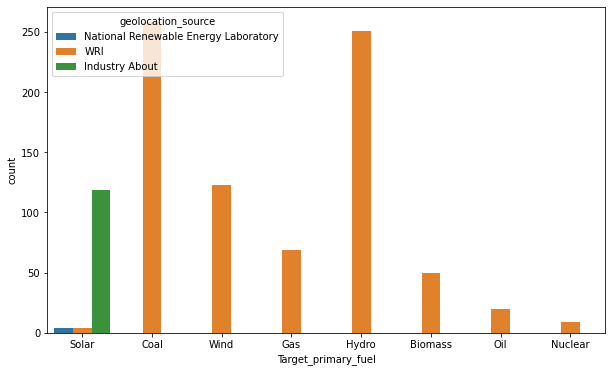

In [30]:
plt.figure(figsize=[10,6])
sns.countplot(powr["Target_primary_fuel"], hue=powr["geolocation_source"])

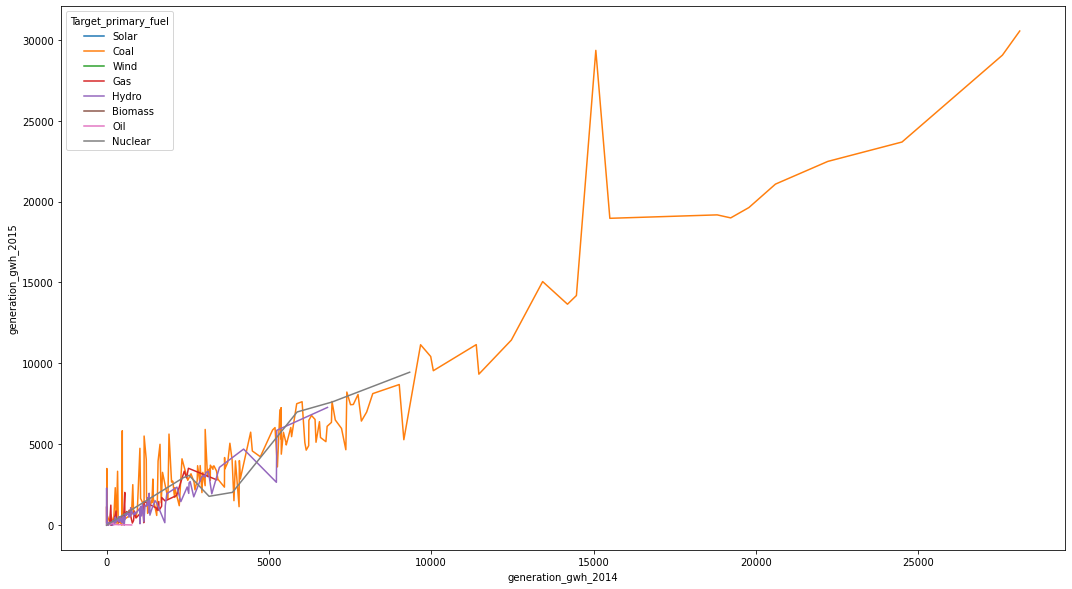

In [31]:
plt.figure(figsize=(18,10))
sns.lineplot(x="generation_gwh_2014", y="generation_gwh_2015", hue='Target_primary_fuel', data=powr)
plt.show()

Text(0.5, 1.0, 'generation_gwh_2014')

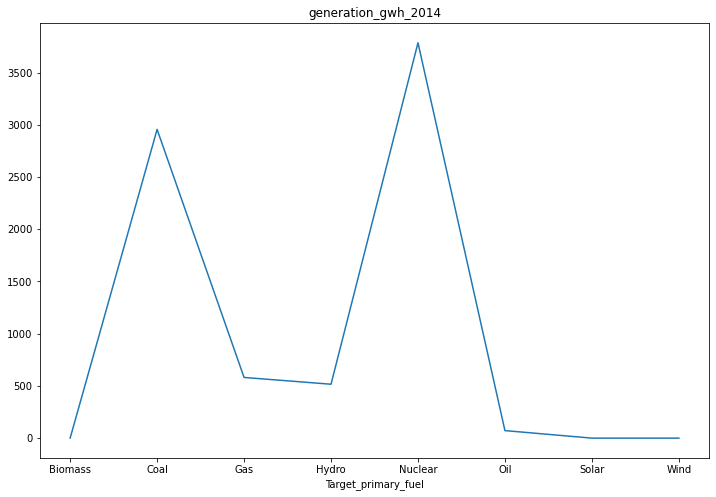

In [32]:
byDate=powr.groupby('Target_primary_fuel').mean()
plt.figure(figsize=(12,8))
byDate['generation_gwh_2014'].plot()
plt.title('generation_gwh_2014')

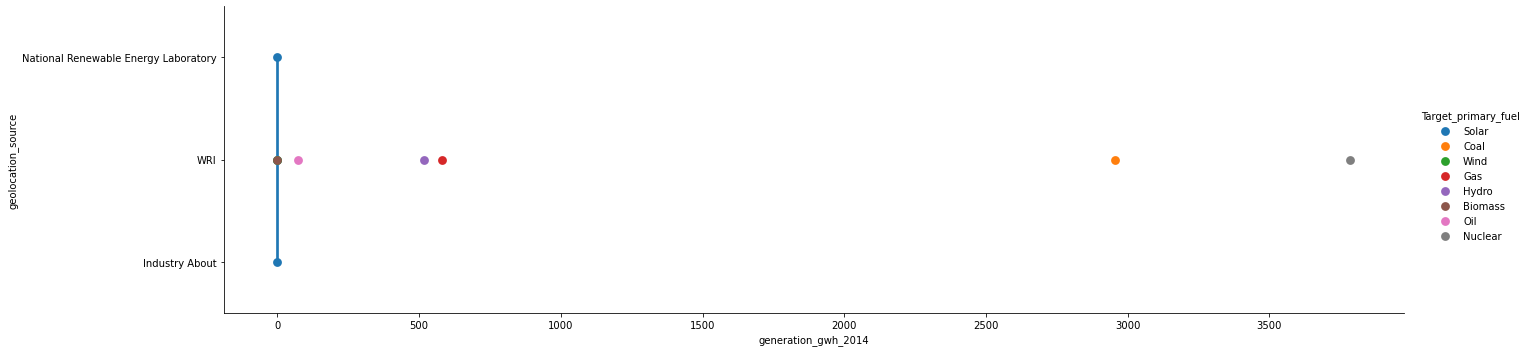

In [33]:
sns.factorplot(x = 'generation_gwh_2014', y = 'geolocation_source', hue = 'Target_primary_fuel', data=powr, aspect= 4, ci=None)

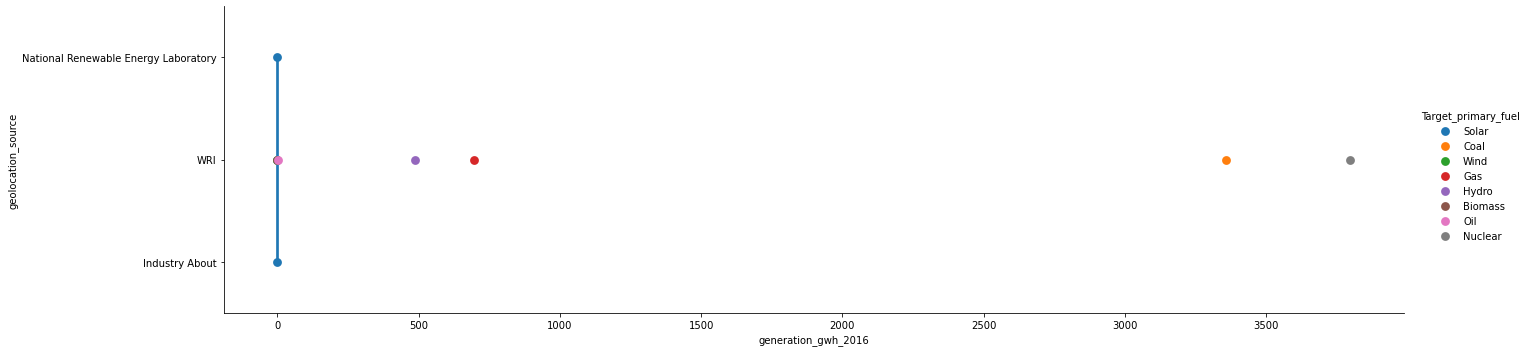

In [34]:
sns.factorplot(x = 'generation_gwh_2016', y = 'geolocation_source', hue = 'Target_primary_fuel', data=powr, aspect= 4, ci=None)

### Observation-4

From the above graphs we can conclude that:
    
    1) In the country and coluntry_long column, we have only one country i.e. India.
    
    2) In the primary fuel column, we have 8 types of fuel like coal, hydro, solar, wind, gas, biomass, oil and nuclear.
    Coal(258), hydro(251), solar(127) and wind(123) are the most important fuels which plays a major role in power.
    and Gas(69), biomass(50), oil(20) and nuclear(9) type fules are very less in numbers.
    
    3) In the other_fuel1 column only three types of fuels are present, oil is first in position(904) and has highest numbers as compare to others. Gas(2) and cogeneration(1) are very less in values.
    
    4) In the source column, we have many authorites and the Central Electricity Authority ranking is top most(519) as compare to others. CDM(124) comes on the second position and then Lancosola, National Renewable Energy Laboratory and National Thermal Power Corporation (NTPC) resp. There are so many authorities as well which falls under the categeory of source.
    
    5) In the geolocation source WRI is top most source, in numbers it is 784.
    in the socond highest source is industry about which is around 119 and then National Renewable Energy Laboratory (4).
    
    6) In the genration data source only one authority is present which is central electricity authority(907)
    
    7) All the primary fuel is releted with WRI geolocation source excluding solar.Solar is also releted with WRI but industry about and National Renewable Energy Laboratory also present in solar fuel in very small amount.
    
    8) If we saw the growth of primary fuel in the year 2014 and 2015, then we will get that coal is the highest grwoing primary fuel.Nuclear is improved the growth in the 2014 and 2015 year. It shows that growth of fuels is similer in both the years.
                            


### Adopting Encoding technique


Dropping some useless columns, which will not help us to prediction. 

In [35]:
powr.drop(['country'],axis=1,inplace=True)
powr.drop(['country_long'],axis=1,inplace=True)
powr.drop(['gppd_idnr'],axis=1,inplace=True)
powr.drop(['url'],axis=1,inplace=True)
powr.drop(['generation_data_source'],axis=1,inplace=True)
powr.drop(['year_of_capacity_data'],axis=1,inplace=True)
powr.drop(['name'],axis=1,inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
enco=['owner','source','geolocation_source','Target_primary_fuel','other_fuel1']

for i in enco:
    powr[i]=le.fit_transform(powr[i])

## Checking Outliers

In [39]:
powr.describe()

capacity_mw    latitude   longitude  other_fuel1  commissioning_year  \
count   907.000000  907.000000  907.000000   907.000000          907.000000   
mean    326.223755   21.086467   77.172109     1.995590         2004.594267   
std     590.085456    6.098262    4.976401     0.081259           15.734928   
min       0.000000    8.168900   68.644700     0.000000         1927.000000   
25%      16.725000   17.072000   73.811550     2.000000         1998.000000   
50%      59.200000   21.281800   76.493800     2.000000         2014.000000   
75%     385.250000   25.176450   79.206100     2.000000         2015.000000   
max    4760.000000   34.649000   95.408000     2.000000         2018.000000   

            owner      source  geolocation_source  generation_gwh_2014  \
count  907.000000  907.000000          907.000000           907.000000   
mean    56.169791   43.847850            1.733186          1067.106713   
std     82.529116   44.642818            0.677151          2926.078576   
min      0.000000    0.000000            0.000000             0.000000   
25%      5.000000   22.000000            2.000000             0.000000   
50%      5.000000   22.000000            2.000000             0.000000   
75%     95.500000   29.500000            2.000000           556.562750   
max    279.000000  190.000000            2.000000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1129.781446          1180.909147          1235.958207   
std            3105.552487          3131.100641          3187.208175   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%             598.926350           670.039394           709.290725   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  Target_primary_fuel  
count           907.000000           907.000000  
mean           1284.630911             3.206174  
std            3298.251107             2.280652  
min               0.000000             0.000000  
25%               0.000000             1.000000  
50%               0.000000             3.000000  
75%             687.754000             6.000000  
max           35136.000000             7.000000

capacity_mw               AxesSubplot(0.125,0.772143;0.227941x0.107857)
latitude               AxesSubplot(0.398529,0.772143;0.227941x0.107857)
longitude              AxesSubplot(0.672059,0.772143;0.227941x0.107857)
other_fuel1               AxesSubplot(0.125,0.642714;0.227941x0.107857)
commissioning_year     AxesSubplot(0.398529,0.642714;0.227941x0.107857)
owner                  AxesSubplot(0.672059,0.642714;0.227941x0.107857)
source                    AxesSubplot(0.125,0.513286;0.227941x0.107857)
geolocation_source     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
generation_gwh_2014    AxesSubplot(0.672059,0.513286;0.227941x0.107857)
generation_gwh_2015       AxesSubplot(0.125,0.383857;0.227941x0.107857)
generation_gwh_2016    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
generation_gwh_2017    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
generation_gwh_2018       AxesSubplot(0.125,0.254429;0.227941x0.107857)
Target_primary_fuel    AxesSubplot(0.398529,0.254429;0.227941x0.

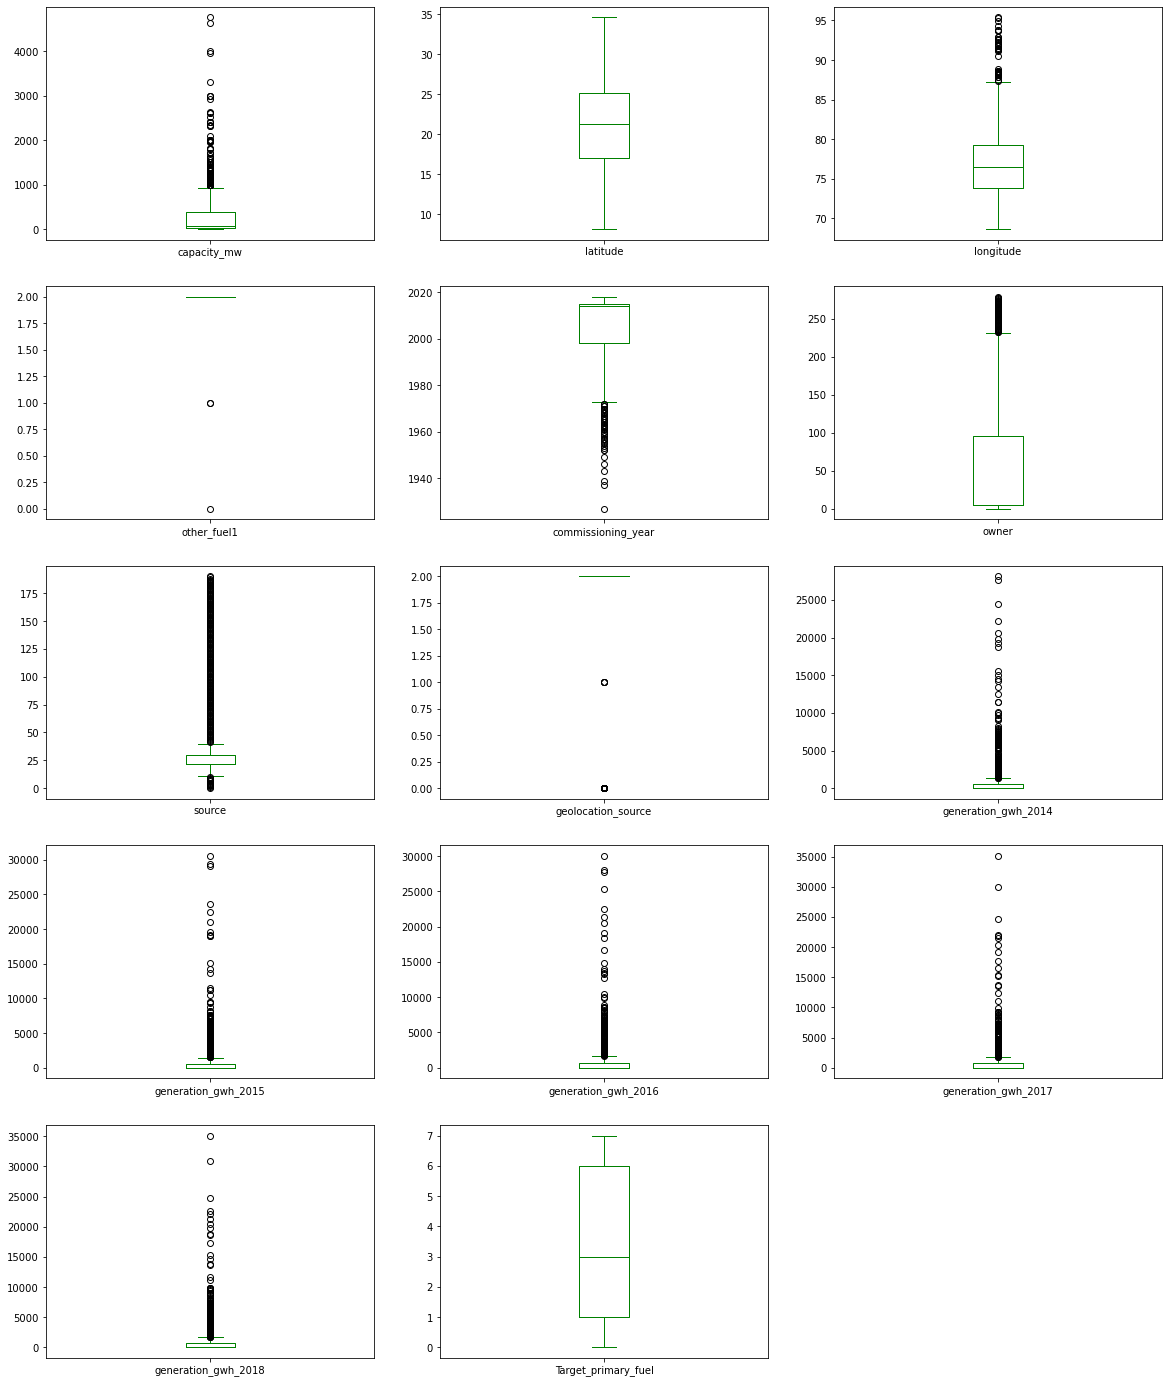

In [40]:
powr.plot(kind='box',subplots=True,layout=(6,3),figsize=[20,30],color='g') 

### Observation-5

Above results shows that outliers are present in the data set.

1) As we can see capacity_mw graph is showing the outliers .The mean of this column is 326 and std is 590 and also their is very large gap between the mean and maximum because mean is 326 and maximum values is 4760, shows the data are highly spreded form the mean, This condition creates the chances of outliers.

2) In the commissioning_year outliers are also present as we can see the mean year is 2004 and the standard devation is 14, means the data are higly spreded from the mean and the chances of outliers is present because of this.

3) In the source column some outliers are present as we can see the 75%tile value is 29 and max values is 190. it is showing the data spredition and chances of outliers.

4) In all the genration growth year huge amount of outliers are present as we can see in the graphs.

We will remove these all outliers in the preprocessing part with the help of zscore.

### Checking Skewness

In [41]:
powr.skew()

capacity_mw             3.123576
latitude               -0.095721
longitude               1.130252
other_fuel1           -20.453120
commissioning_year     -1.714873
owner                   1.364406
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     4.986588
generation_gwh_2015     5.260778
generation_gwh_2016     4.984874
generation_gwh_2017     4.979870
generation_gwh_2018     4.846091
Target_primary_fuel     0.472251
dtype: float64

In [42]:
from scipy.stats import skew

capacity_mw
3.1184079967331835


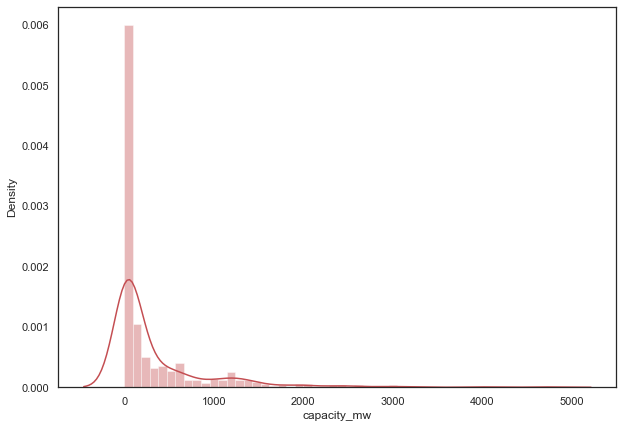

latitude
-0.09556299390997249


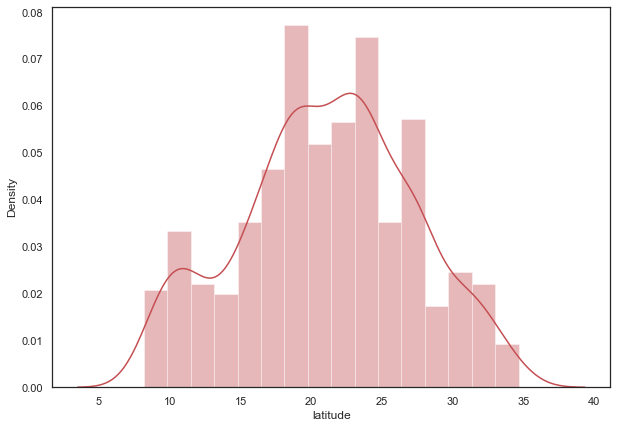

longitude
1.1283816992395856


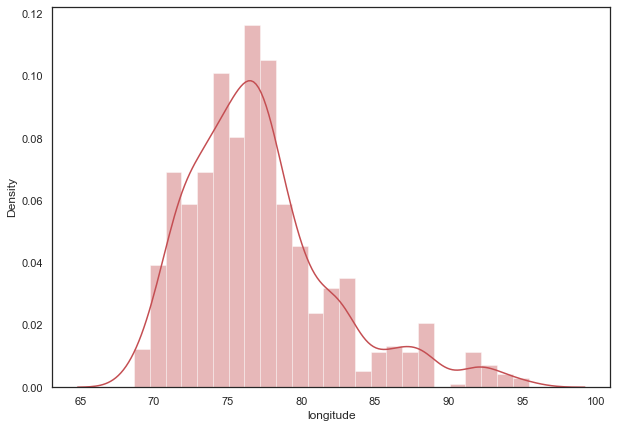

other_fuel1
-20.419278999342378


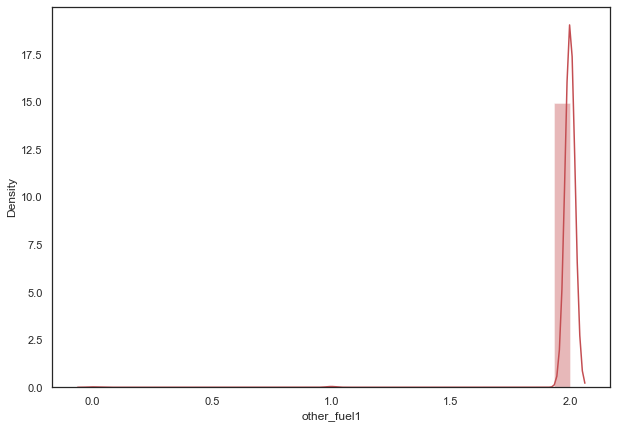

commissioning_year
-1.71203584916001


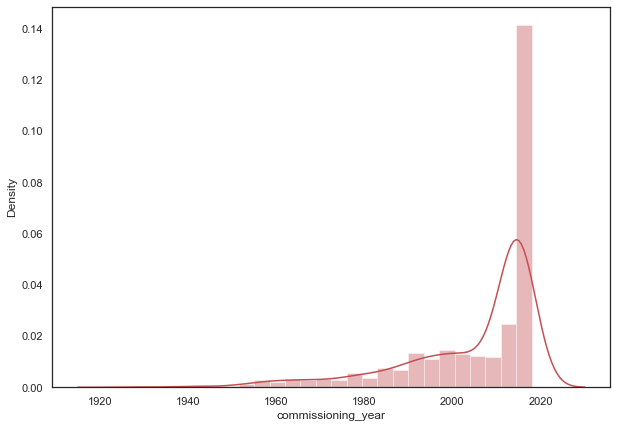

owner
1.3621481226400756


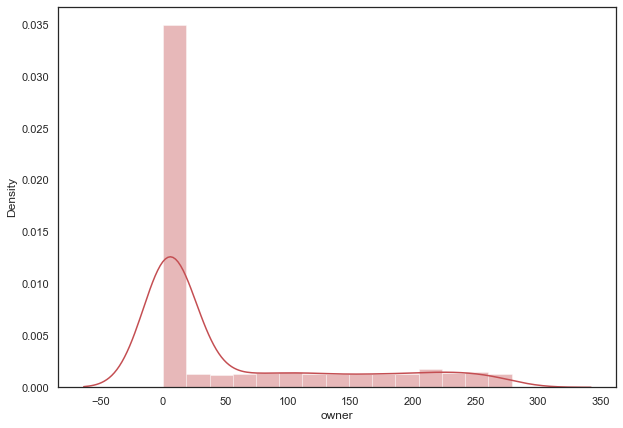

source
1.8243499230136286


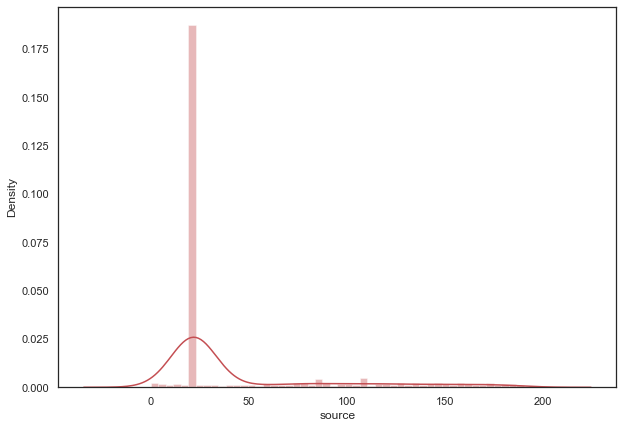

geolocation_source
-2.1562674966245035


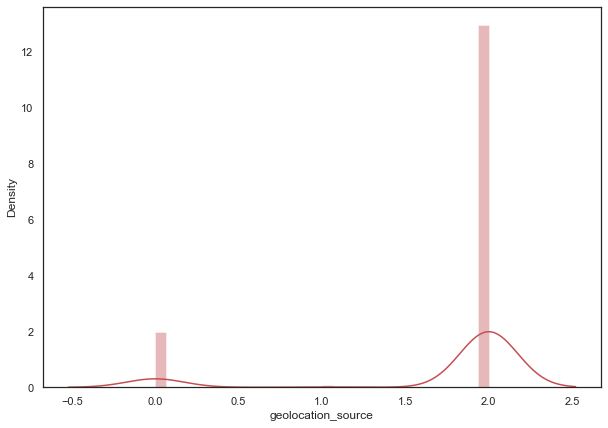

generation_gwh_2014
4.978337121381584


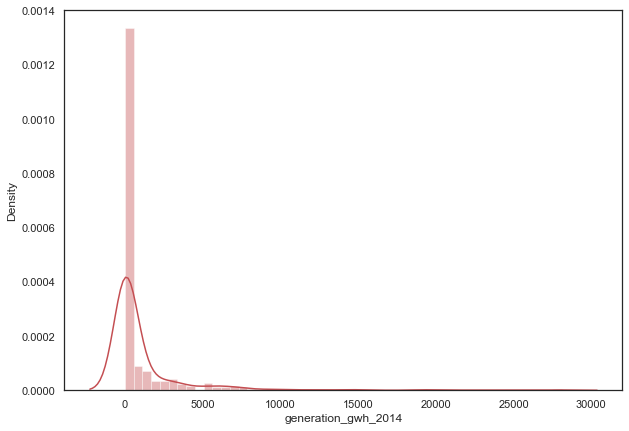

generation_gwh_2015
5.252073475848379


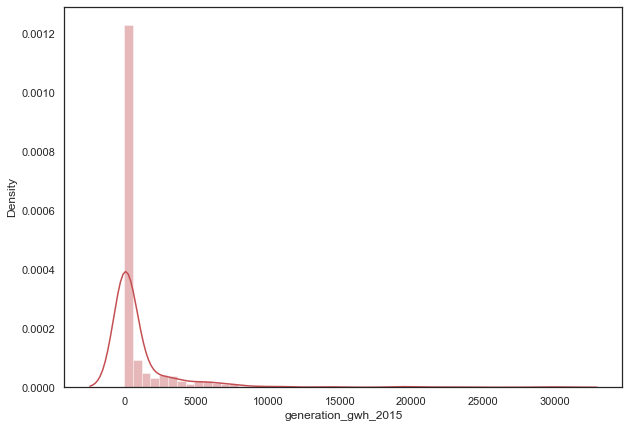

generation_gwh_2016
4.97662603116805


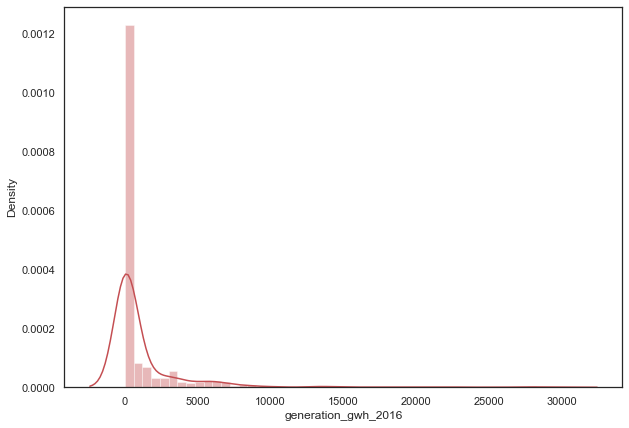

generation_gwh_2017
4.971630474502584


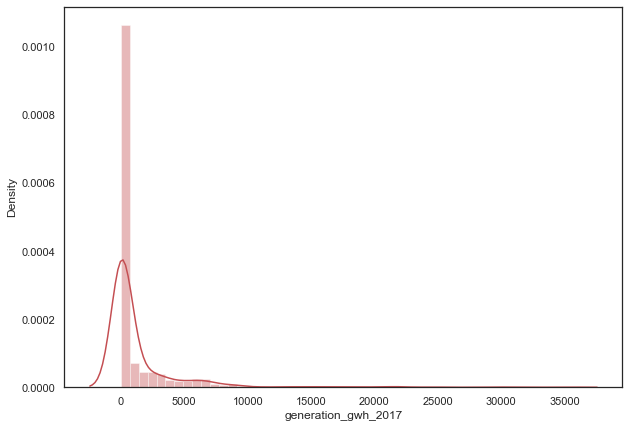

generation_gwh_2018
4.838072560160519


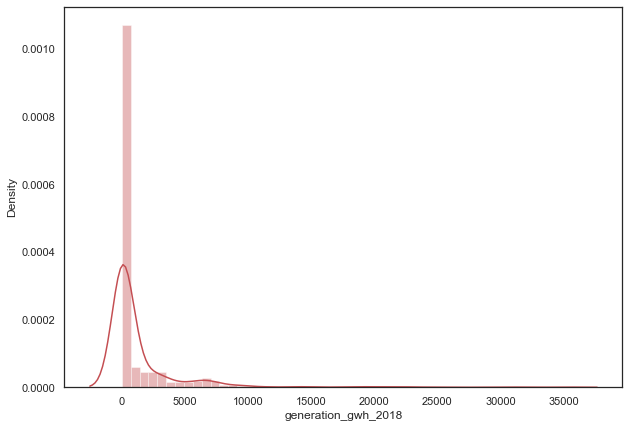

Target_primary_fuel
0.4714691858252111


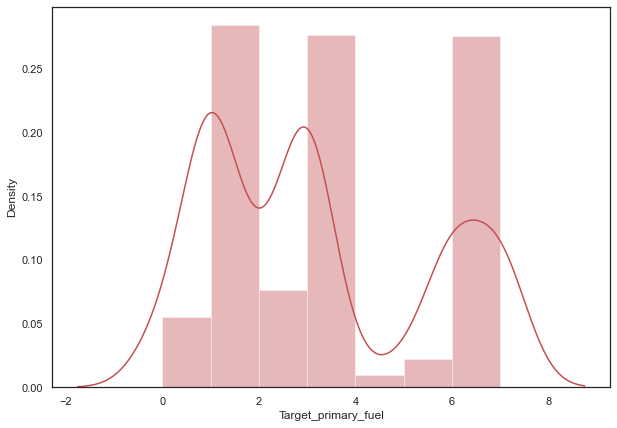

In [43]:
for i in powr:
    print(i)
    print(skew(powr[i]))
    
    sns.set_theme(style="white")
    plt.figure(figsize=(10,7))
    sns.distplot(powr[i],color='r')
    plt.show()

### Observation-6

As we can see our data are skewed in some columns like..77,76

1) In the capacity_mw skewness is present as we can see the mean is 326 and mediam is only 59 (mean>median).

2) In the longitude column the skewness is present or we can say the data are skewed in th elongtitude column because the mean is 77 and mediam is 76.

3) In the owner and source columns skewness is present because the mean is 56 and mediam is 5 in owner column and similerly the mean is 43 and median is 22 in source column.in both the condition mean>median.


4) In all the generation_gwh year column, skewed data is present. In all these column the diffrence between mean and maximum and 75tile and max is very high, which creates the condition of skewness.

### Checking Correlation

In [44]:
powr.corr()['Target_primary_fuel'].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.368766
generation_gwh_2018   -0.315301
generation_gwh_2017   -0.313935
generation_gwh_2016   -0.304119
generation_gwh_2015   -0.291273
generation_gwh_2014   -0.285822
latitude              -0.020203
other_fuel1            0.004912
source                 0.053613
commissioning_year     0.164947
owner                  0.284296
Target_primary_fuel    1.000000
Name: Target_primary_fuel, dtype: float64

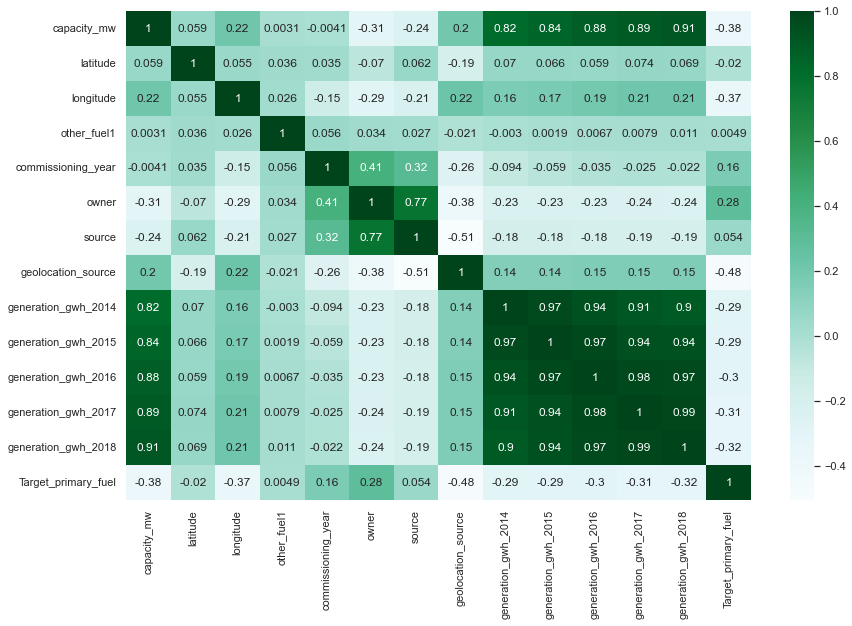

In [45]:
plt.figure(figsize=[14,9])
sns.heatmap(powr.corr(),annot=True,cmap='BuGn')
plt.show()

## Checking Correlation
### We will check correlation in 2 ways:
### 1.Correlation between the each colunm with target colunm.
### 2.Correlation between the colunms.

<AxesSubplot:>

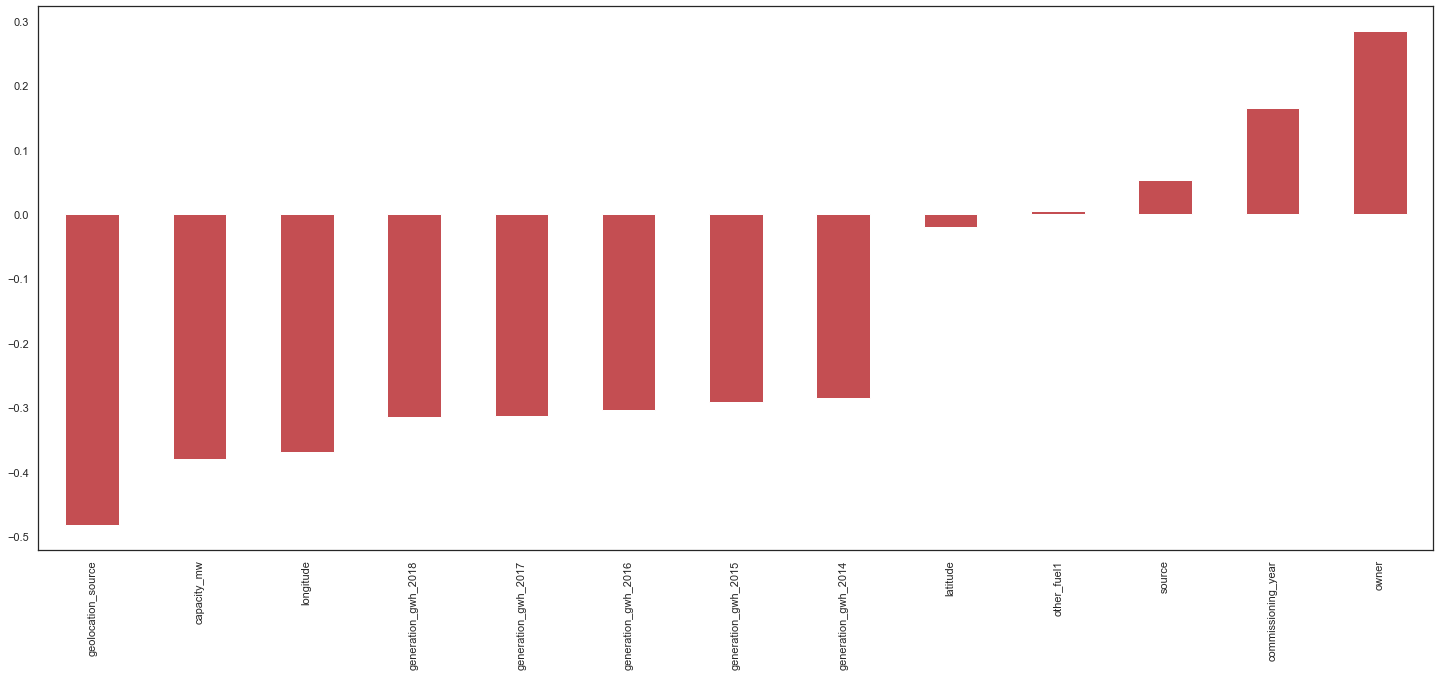

In [46]:
plt.figure(figsize =(25, 10))
powr.corr()['Target_primary_fuel'].sort_values().drop(['Target_primary_fuel']).plot(kind ='bar',color='r')

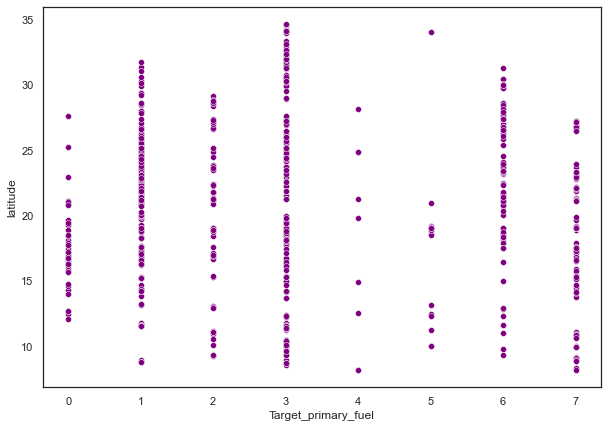

In [47]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='latitude',color='purple')
plt.show()

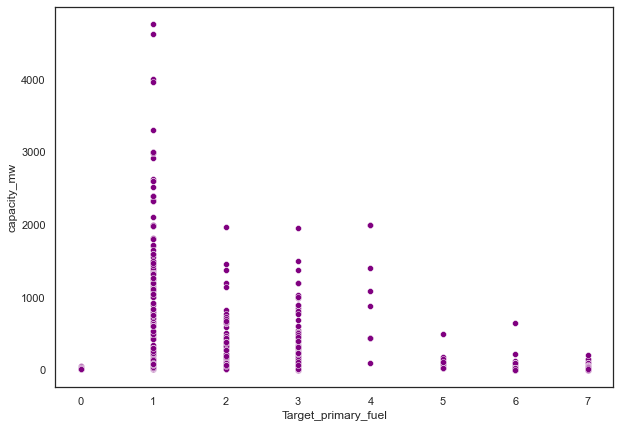

In [48]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='capacity_mw',color='purple')
plt.show()

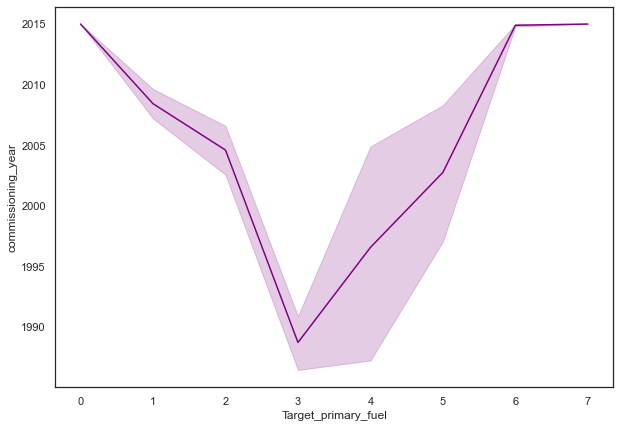

In [49]:
plt.figure(figsize=[10,7])
sns.lineplot(data=powr,x='Target_primary_fuel',y='commissioning_year',color='purple')
plt.show()

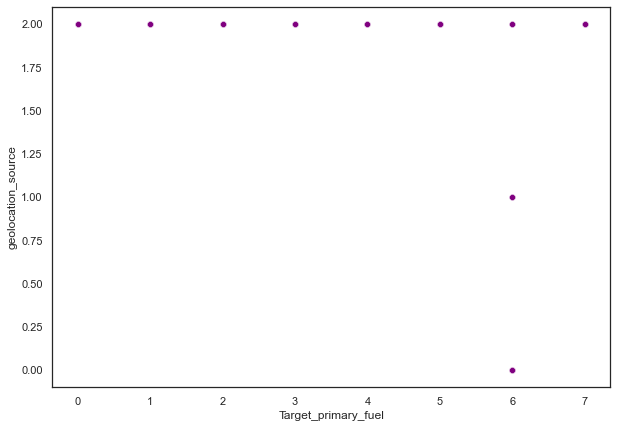

In [50]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='geolocation_source',color='purple')
plt.show()

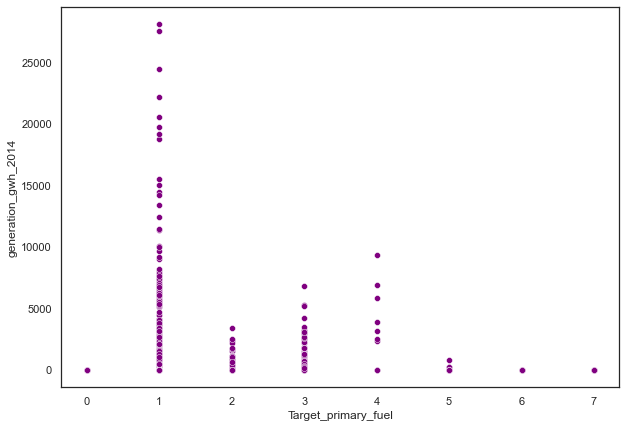

In [51]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='generation_gwh_2014',color='purple')
plt.show()

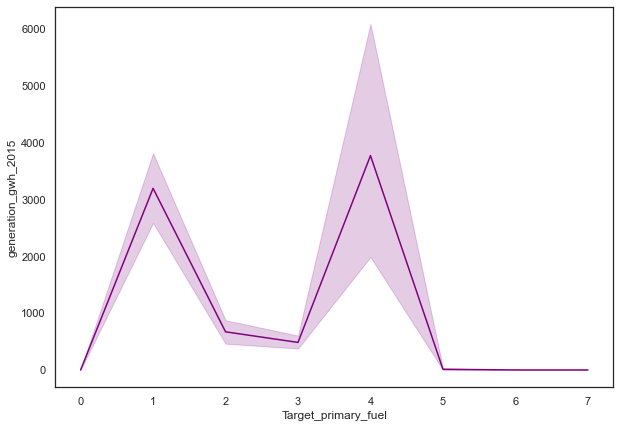

In [52]:
plt.figure(figsize=[10,7])
sns.lineplot(data=powr,x='Target_primary_fuel',y='generation_gwh_2015',color='purple')
plt.show()

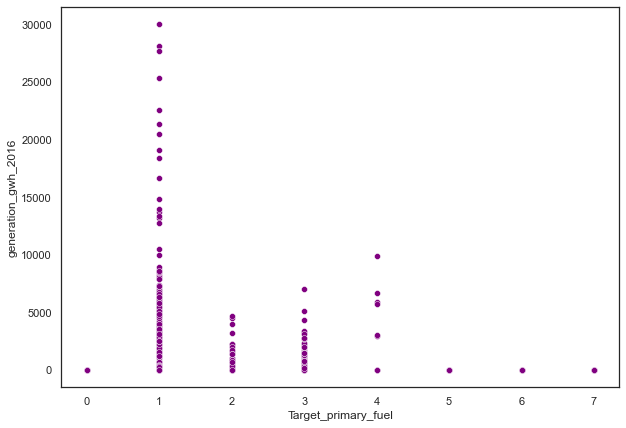

In [53]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='generation_gwh_2016',color='purple')
plt.show()

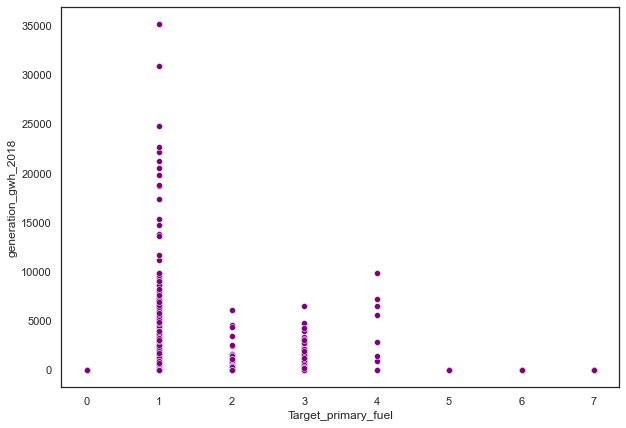

In [54]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='Target_primary_fuel',y='generation_gwh_2018',color='purple')
plt.show()

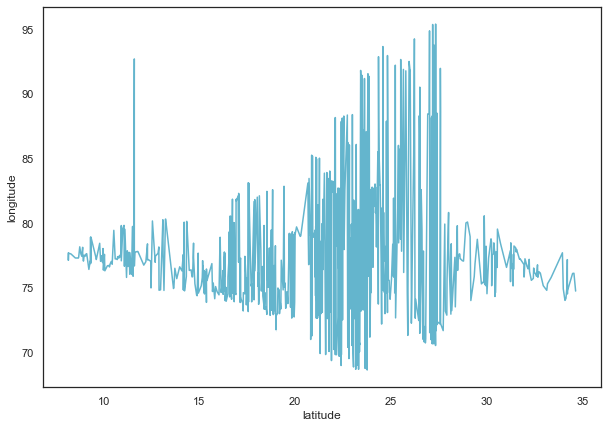

In [55]:
plt.figure(figsize=[10,7])
sns.lineplot(data=powr,x='latitude',y='longitude',color='c')
plt.show()

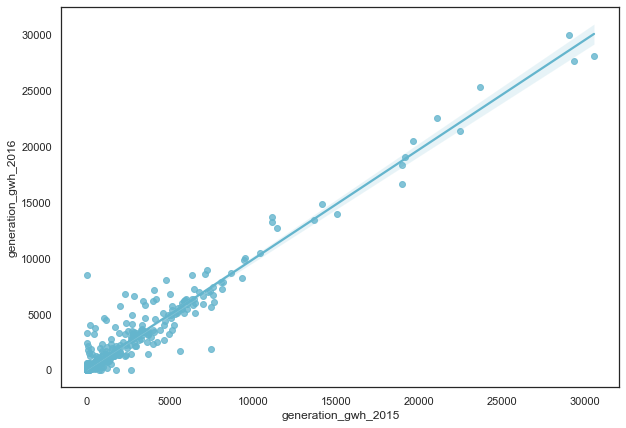

In [56]:
plt.figure(figsize=[10,7])
sns.regplot(data=powr,x='generation_gwh_2015',y='generation_gwh_2016',color='c')
plt.show()

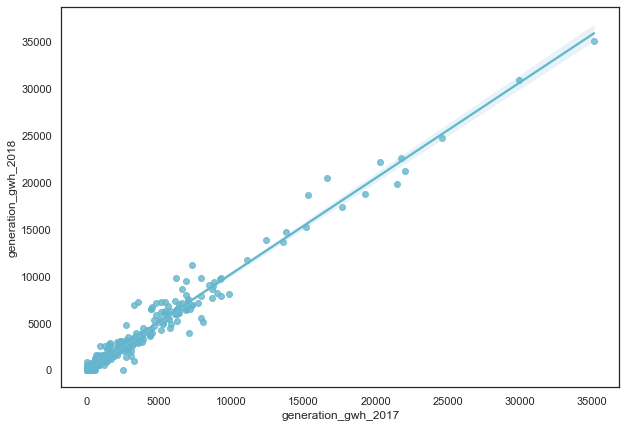

In [57]:
plt.figure(figsize=[10,7])
sns.regplot(data=powr,x='generation_gwh_2017',y='generation_gwh_2018',color='c')
plt.show()

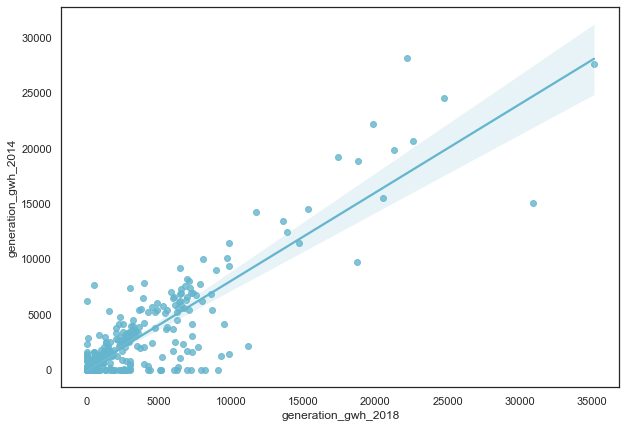

In [58]:
plt.figure(figsize=[10,7])
sns.regplot(data=powr,x='generation_gwh_2018',y='generation_gwh_2014',color='c')
plt.show()

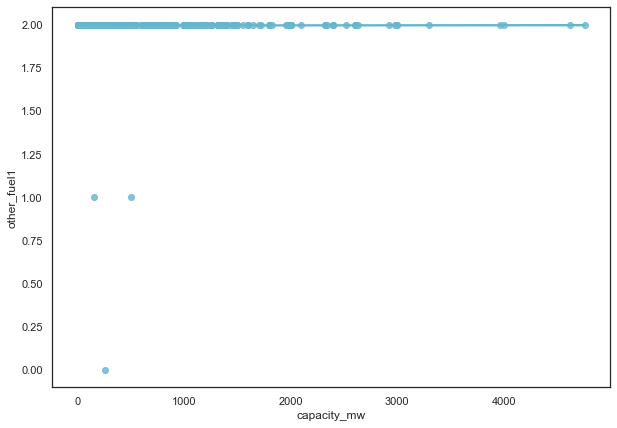

In [59]:
plt.figure(figsize=[10,7])
sns.regplot(data=powr,x='capacity_mw',y='other_fuel1',color='c')
plt.show()

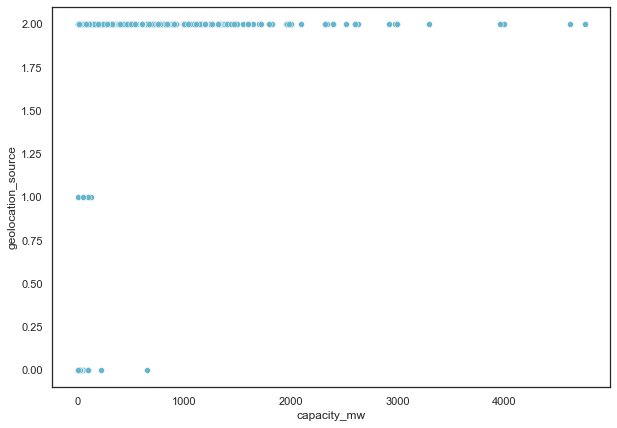

In [60]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='geolocation_source',color='c')
plt.show()

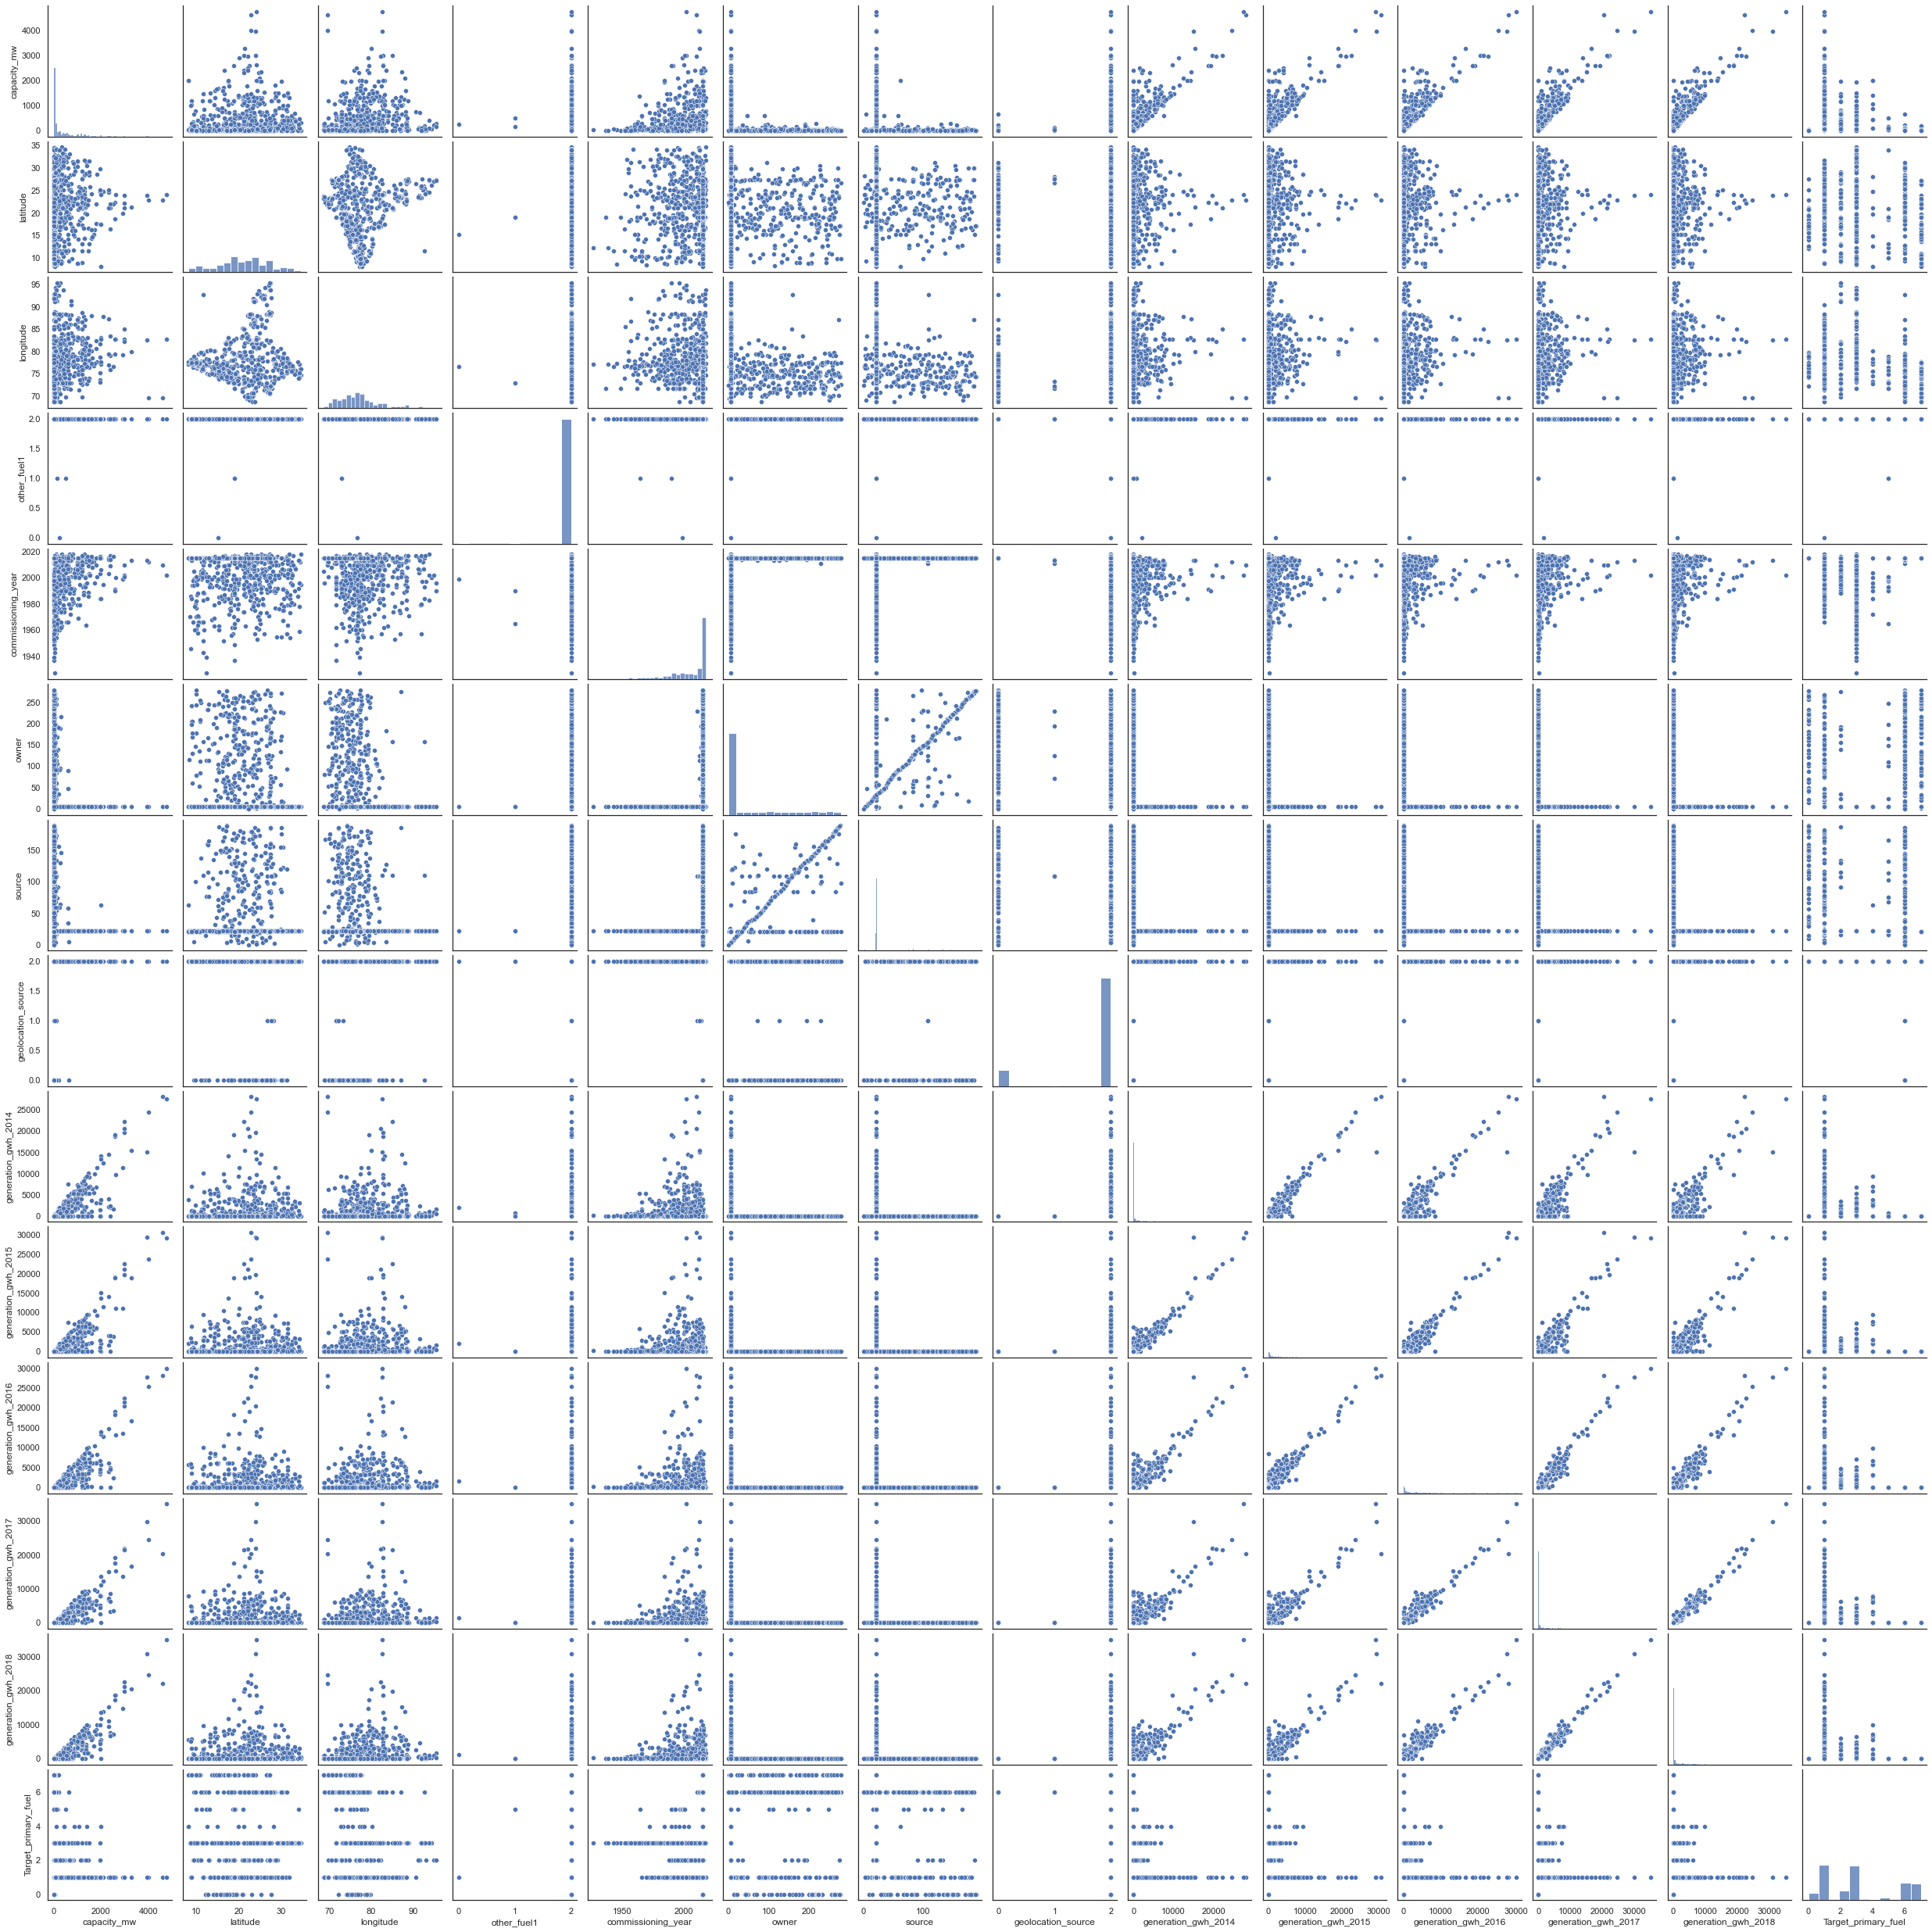

In [61]:
sns.pairplot(powr)
plt.show()

### Observation-7

From the above results:

1) As we can see that owner(0.28), commissioning year and source columns has positive correlation with target column.

2) Geolocation source, capacity_mw, longitude, genration_grwh_2014, genration_grwh_2015, genration_grwh_2016, genration_grwh_2017
 and genration_grwh_2019 are negativly correleted with target column.
    
3) The latitude of primary_fuel like biomass, coal, gas and solar is high as compare to others.

4) The coal capacity_mw is higher as compare to others primary_fuel.
   Gas, Hydro and Nuclear primari fuels capacity_mw is mediam as compare to lower fuels.
    
5) In the year 1990 only hydro fuel was present then gas, nuclear and oil was present in the year 2005 and in 2015 all the primary fuel has come.

6) The geolocation _source of all the fuels are WRI only solar fuel releted with all the geolocation source.

7) In the year genration_grwh_2014, the coal demand is higher as compare to others.

8) In the year genration_grwh_2015, the coal and nuclear demand is high as compare to others.

9) In the year genration_grwh_2017 and year genration_grwh_2018 the coal demand is high.

10) Longitude is very wide in latitude of 22 to 27 .

11) genration_grwh_2014 and genration_grwh_2015 are highly correleted with each other means ones increases another also increases.

12) genration_grwh_2016 and genration_grwh_2017 are highly correleted with each other means ones increases another also increases.

## Data Preprocessing

In [62]:
x=powr.iloc[:,0:-1]
y=powr.iloc[:,-1]

In [63]:
x.shape

(907, 13)

In [64]:
y.shape

(907,)

In [65]:
col=x.columns

## Removing outliers using zscore method

In [66]:
from scipy.stats import zscore

In [67]:
z=np.abs(zscore(x))
print(z.shape)

(907, 13)


In [68]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 538, 541, 573, 577, 583, 601,
       621, 623, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709,
       721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726,
       726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807,
       808, 808, 808, 808, 808, 808, 811, 813, 817, 818, 832, 848, 870,
       871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64), array([ 0,  9, 10, 11, 12,  6,  6,  0,  8,  9, 10, 11, 12,  0,  8,  2,  2,
        6,  0,  8,  9, 10, 11, 12,  4,  2,  6,  0,  8,  9, 1

In [69]:
x=x[(z<3).all(axis=1)]

In [70]:
y=y[(z<3).all(axis=1)]

In [71]:
x.shape

(832, 13)

In [72]:
y.shape

(832,)

#### We have removed the outliers

.

## Removing Skewness

In [73]:
x.skew()

capacity_mw            1.971222
latitude              -0.068189
longitude              0.957391
other_fuel1            0.000000
commissioning_year    -1.514083
owner                  1.318465
source                 1.780743
geolocation_source    -2.100174
generation_gwh_2014    2.764337
generation_gwh_2015    2.595302
generation_gwh_2016    2.534732
generation_gwh_2017    2.449508
generation_gwh_2018    2.498239
dtype: float64

In [74]:
from sklearn.preprocessing import power_transform

In [75]:
x=power_transform(x,method='yeo-johnson')

In [76]:
x=pd.DataFrame(x,columns=col)

In [77]:
x.skew()

capacity_mw            0.013192
latitude              -0.068084
longitude              0.032950
other_fuel1            0.000000
commissioning_year    -1.079586
owner                  0.436652
source                -0.177686
geolocation_source    -2.072059
generation_gwh_2014    0.526959
generation_gwh_2015    0.436251
generation_gwh_2016    0.388902
generation_gwh_2017    0.379570
generation_gwh_2018    0.366742
dtype: float64

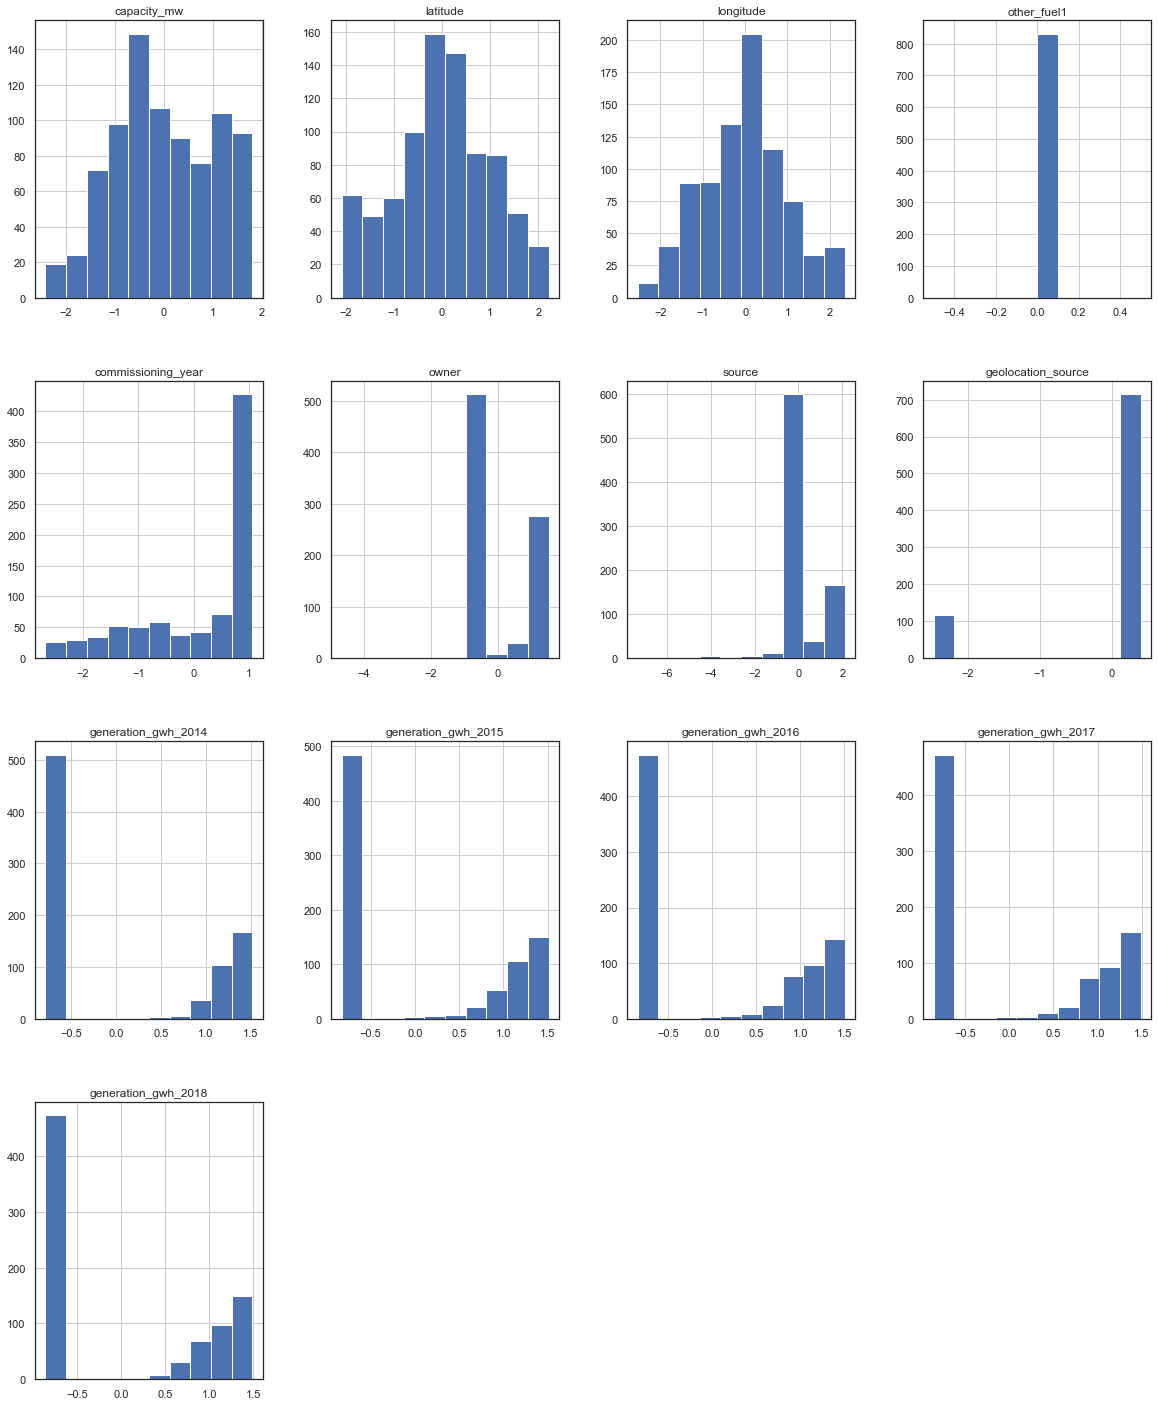

In [78]:
x.hist(figsize=(20,25))
plt.show()

### Skewness is removed

## Data Scaling with Min Max sacler

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
mm=MinMaxScaler()

In [81]:
x=mm.fit_transform(x)

In [82]:
x=pd.DataFrame(x,columns=col)

In [83]:
x

capacity_mw  latitude  longitude  other_fuel1  commissioning_year  \
0       0.176565  0.755833   0.355670          0.0            0.801435   
1       0.624435  0.626764   0.438385          0.0            0.911012   
2       0.506903  0.518661   0.065802          0.0            0.911012   
3       0.665291  0.592960   0.989351          0.0            0.632180   
4       0.987261  0.520795   0.775391          0.0            0.911012   
..           ...       ...        ...          ...                 ...   
827     0.972987  0.306847   0.580089          0.0            0.940002   
828     0.195099  0.178391   0.616440          0.0            0.911012   
829     0.451763  0.268363   0.491980          0.0            0.911012   
830     0.598468  0.611042   0.387368          0.0            0.911012   
831     0.396352  0.066664   0.585624          0.0            0.911012   

        owner    source  geolocation_source  generation_gwh_2014  \
0    0.993694  0.947946            0.069782             0.000000   
1    0.997576  0.998255            1.000000             0.000000   
2    0.454883  0.727074            1.000000             0.000000   
3    0.635124  0.734299            1.000000             0.880679   
4    0.635124  0.734299            1.000000             0.959507   
..        ...       ...                 ...                  ...   
827  0.635124  0.734299            1.000000             0.000000   
828  0.965674  0.907191            0.000000             0.000000   
829  0.635124  0.727074            1.000000             0.000000   
830  0.954330  0.873914            1.000000             0.000000   
831  1.000000  0.727074            1.000000             0.000000   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.000000             0.000000             0.000000   
1               0.000000             0.000000             0.000000   
2               0.000000             0.000000             0.000000   
3               0.879502             0.869055             0.848126   
4               0.980864             0.979112             0.974000   
..                   ...                  ...                  ...   
827             0.152019             0.769300             0.866641   
828             0.000000             0.000000             0.000000   
829             0.000000             0.000000             0.000000   
830             0.000000             0.000000             0.000000   
831             0.000000             0.000000             0.000000   

     generation_gwh_2018  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.837044  
4               0.985427  
..                   ...  
827             0.843730  
828             0.000000  
829             0.000000  
830             0.000000  
831             0.000000  

[832 rows x 13 columns]

# VIF:
### Variance inflation factor:

In [84]:
import statsmodels.api as si
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [86]:
vif(x)

Variables  VIF Factor
0           capacity_mw   22.642829
1              latitude    5.697363
2             longitude    9.056277
3           other_fuel1         NaN
4    commissioning_year   15.927606
5                 owner   77.048715
6                source   85.000185
7    geolocation_source    9.187647
8   generation_gwh_2014   12.378751
9   generation_gwh_2015   24.391809
10  generation_gwh_2016   37.218737
11  generation_gwh_2017   59.800848
12  generation_gwh_2018   44.732490

In [87]:
x.drop(['source'],axis=1,inplace=True)

In [88]:
vif(x)

Variables  VIF Factor
0           capacity_mw   21.945480
1              latitude    5.332395
2             longitude    8.780712
3           other_fuel1         NaN
4    commissioning_year   15.799159
5                 owner   20.769089
6    geolocation_source    9.172159
7   generation_gwh_2014   12.375808
8   generation_gwh_2015   24.390640
9   generation_gwh_2016   37.206100
10  generation_gwh_2017   59.785846
11  generation_gwh_2018   44.703012

In [89]:
x.drop(['other_fuel1'],axis=1,inplace=True)
x.drop(['generation_gwh_2017'],axis=1,inplace=True)

In [90]:
vif(x)

Variables  VIF Factor
0          capacity_mw   21.905726
1             latitude    5.316544
2            longitude    8.780703
3   commissioning_year   15.799085
4                owner   20.733891
5   geolocation_source    9.171187
6  generation_gwh_2014   12.334713
7  generation_gwh_2015   24.281479
8  generation_gwh_2016   30.818075
9  generation_gwh_2018   17.677702

In [91]:
x.drop(['generation_gwh_2016'],axis=1,inplace=True)

In [92]:
vif(x)

Variables  VIF Factor
0          capacity_mw   21.630922
1             latitude    5.306923
2            longitude    8.780632
3   commissioning_year   15.749286
4                owner   20.616586
5   geolocation_source    9.155205
6  generation_gwh_2014   12.334030
7  generation_gwh_2015   17.083336
8  generation_gwh_2018   10.802443

### Balancing the target column using SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

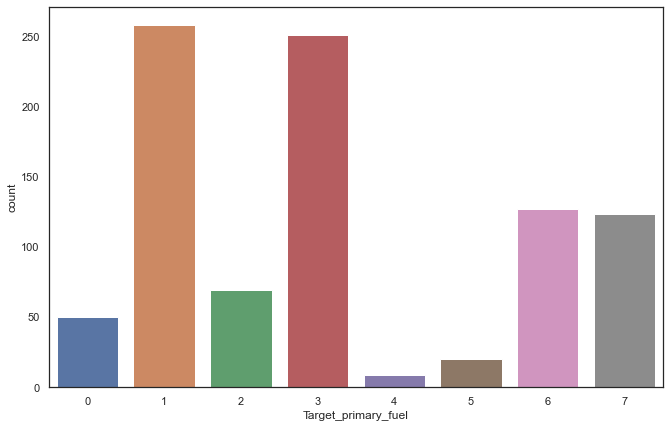

In [96]:
plt.figure(figsize=[11,7])
sns.countplot(powr['Target_primary_fuel'])
plt.show()

In [97]:
sm=SMOTE()

In [98]:
x,y=sm.fit_resample(x,y)

In [99]:
x.shape

(1824, 9)

In [100]:
y.shape

(1824,)

## Model learning phase-prediction phase-1(Classification)

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use classification model because our target column is catagorical in nature.

For classification model, Some matrix we are going to find like:


#### Models

1. Decision Tree classifier
2. KNeighbors classifier
3. Support vectod machine classifier
4. Random Forest classifier
5. AdaBoost classifier
6. Gradient Boosting classifier
7. XGboost classifier
8. Naive bayes classifier

In [101]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xg

### Creating a function for finding Best random state 

In [102]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))       

## Logistic Regression

Finding best random state by calling model_select function

In [104]:
model_select(LogisticRegression)

Max score is 0.6965174129353234 at random state 64


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=34)

In [106]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.6343283582089553
[[49  0  0  0  0  0  0  5]
 [11 27  2  5  6  0  0  2]
 [ 2  7  7 11  7  9  0  7]
 [ 0  5  1 30  6  6  0  0]
 [ 0  0  0 10 49  6  0  0]
 [ 3  0  0  2  0 24  0 16]
 [ 0  0  0  0  0  1 38  0]
 [16  0  0  0  0  1  0 31]]
              precision    recall  f1-score   support

           0       0.60      0.91      0.73        54
           1       0.69      0.51      0.59        53
           2       0.70      0.14      0.23        50
           3       0.52      0.62      0.57        48
           4       0.72      0.75      0.74        65
           5       0.51      0.53      0.52        45
           6       1.00      0.97      0.99        39
           7       0.51      0.65      0.57        48

    accuracy                           0.63       402
   macro avg       0.66      0.64      0.62       402
weighted avg       0.65      0.63      0.61       402



In [107]:
for i in range(12,20):
    cvr=cross_val_score(lr,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.6529605263157895
Cross validation when cv= 13 --- 0.6517964305198347
Cross validation when cv= 14 --- 0.6534728630148477
Cross validation when cv= 15 --- 0.6540170708576073
Cross validation when cv= 16 --- 0.6529605263157894
Cross validation when cv= 17 --- 0.6528973998737605
Cross validation when cv= 18 --- 0.6528937207446235
Cross validation when cv= 19 --- 0.6546052631578947


In [168]:
cvlr=19
Modellr=63.43
Cslr= 65.46
Diffrencelr= 65.46-63.43

### Kneighbors classifier

Finding best random state by calling model_select function

In [109]:
model_select(KNeighborsClassifier)

Max score is 0.8980099502487562 at random state 64


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=64)

In [123]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8980099502487562
[[49  2  0  0  0  0  0  0]
 [ 3 30  3  0  2  2  0  2]
 [ 1  1 36  0  2  7  0  0]
 [ 0  6  2 41  0  1  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 0  0  1  0  0 44  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 3  0  0  0  0  2  1 45]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.77      0.71      0.74        42
           2       0.86      0.77      0.81        47
           3       1.00      0.82      0.90        50
           4       0.94      1.00      0.97        59
           5       0.79      0.98      0.87        45
           6       0.98      1.00      0.99        57
           7       0.96      0.88      0.92        51

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



In [124]:
for i in range(8,20):
    cvr=cross_val_score(knn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 8 --- 0.8667763157894737
Cross validation when cv= 9 --- 0.8667755938155391
Cross validation when cv= 10 --- 0.8689695550351288
Cross validation when cv= 11 --- 0.8634870058747388
Cross validation when cv= 12 --- 0.8706140350877195
Cross validation when cv= 13 --- 0.8695113397241058
Cross validation when cv= 14 --- 0.8711559432933481
Cross validation when cv= 15 --- 0.8684189134263647
Cross validation when cv= 16 --- 0.868421052631579
Cross validation when cv= 17 --- 0.8684106041170362
Cross validation when cv= 18 --- 0.8695345024698549
Cross validation when cv= 19 --- 0.8689692982456141


In [125]:
cvknn=14
Modelknn= 89.80
Csknn= 87.11
Diffrenceknn= 89.80-87.11

### Naive bayes classifier

Finding best random state by calling model_select function

In [126]:
model_select(MultinomialNB)

Max score is 0.5572139303482587 at random state 64


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=64)

In [128]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.5572139303482587
[[48  0  0  0  0  0  0  3]
 [ 9 15  0  2  8  0  0  8]
 [ 2  3  9  1 15  5  0 12]
 [ 8  9  0 14 13  0  0  6]
 [ 1  1  3  6 43  1  0  4]
 [ 4  0  6  0  0  4  0 31]
 [ 0  0  0  0  0  0 57  0]
 [17  0  0  0  0  0  0 34]]
              precision    recall  f1-score   support

           0       0.54      0.94      0.69        51
           1       0.54      0.36      0.43        42
           2       0.50      0.19      0.28        47
           3       0.61      0.28      0.38        50
           4       0.54      0.73      0.62        59
           5       0.40      0.09      0.15        45
           6       1.00      1.00      1.00        57
           7       0.35      0.67      0.46        51

    accuracy                           0.56       402
   macro avg       0.56      0.53      0.50       402
weighted avg       0.57      0.56      0.52       402



In [129]:
for i in range(8,20):
    cvr=cross_val_score(mn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 8 --- 0.4824561403508772
Cross validation when cv= 9 --- 0.4813523224243607
Cross validation when cv= 10 --- 0.48405692667987743
Cross validation when cv= 11 --- 0.48081582528460953
Cross validation when cv= 12 --- 0.48684210526315796
Cross validation when cv= 13 --- 0.4823980983555452
Cross validation when cv= 14 --- 0.4846237731733915
Cross validation when cv= 15 --- 0.4867858917039245
Cross validation when cv= 16 --- 0.48026315789473684
Cross validation when cv= 17 --- 0.4824130067395598
Cross validation when cv= 18 --- 0.48572014064151514
Cross validation when cv= 19 --- 0.48739035087719296


In [130]:
cvgn=19
Modelgn= 55.72
Csgn= 48.73
Diffrencegn=55.72-48.73

### Decision tree classifier

Finding best random state by calling model_select function

In [131]:
model_select(DecisionTreeClassifier)

Max score is 0.8955223880597015 at random state 36


In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=36)

In [133]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8905472636815921
[[49  4  0  0  0  0  0  3]
 [ 0 30  5  2  3  0  0  2]
 [ 0  3 45  2  0  0  0  0]
 [ 0  4  1 55  2  0  0  0]
 [ 0  2  2  0 38  0  0  0]
 [ 0  1  3  0  0 51  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 2  2  0  0  0  0  1 43]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.65      0.71      0.68        42
           2       0.80      0.90      0.85        50
           3       0.93      0.89      0.91        62
           4       0.88      0.90      0.89        42
           5       1.00      0.93      0.96        55
           6       0.98      1.00      0.99        47
           7       0.90      0.90      0.90        48

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.90      0.89      0.89       402



In [134]:
for i in range(7,20):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8530798703212498
Cross validation when cv= 8 --- 0.862390350877193
Cross validation when cv= 9 --- 0.8580180678166339
Cross validation when cv= 10 --- 0.8651684381192577
Cross validation when cv= 11 --- 0.8552623718012545
Cross validation when cv= 12 --- 0.8607456140350876
Cross validation when cv= 13 --- 0.8574896734471202
Cross validation when cv= 14 --- 0.8579984900595589
Cross validation when cv= 15 --- 0.8629318520525673
Cross validation when cv= 16 --- 0.8651315789473684
Cross validation when cv= 17 --- 0.8668020686987151
Cross validation when cv= 18 --- 0.8591643478073299
Cross validation when cv= 19 --- 0.8601973684210527


In [135]:
cvdt=17
Modeldt= 89.05
Csdt=86.68
Diffrencedt= 89.05-86.68

### Support vector machine classifier

Finding best random state by calling model_select function

In [136]:
model_select(SVC)

Max score is 0.7935323383084577 at random state 10


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=10)

In [138]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7935323383084577
[[49  0  0  0  0  1  0  1]
 [ 6 17  1  0  4  2  0  2]
 [ 1  6 19  1  8 10  0  1]
 [ 0  1  2 45  3  1  0  0]
 [ 0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0 53  0  4]
 [ 0  0  0  0  0  3 61  0]
 [23  0  0  0  0  2  0 33]]
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        51
           1       0.71      0.53      0.61        32
           2       0.86      0.41      0.56        46
           3       0.98      0.87      0.92        52
           4       0.74      1.00      0.85        42
           5       0.74      0.93      0.82        57
           6       1.00      0.95      0.98        64
           7       0.80      0.57      0.67        58

    accuracy                           0.79       402
   macro avg       0.81      0.78      0.77       402
weighted avg       0.82      0.79      0.78       402



In [139]:
for i in range(7,20):
    cvr=cross_val_score(svc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7642457159698539
Cross validation when cv= 8 --- 0.7658991228070176
Cross validation when cv= 9 --- 0.765912305516266
Cross validation when cv= 10 --- 0.769732180387918
Cross validation when cv= 11 --- 0.7675229844999834
Cross validation when cv= 12 --- 0.7702850877192983
Cross validation when cv= 13 --- 0.769160626607435
Cross validation when cv= 14 --- 0.7708078181360625
Cross validation when cv= 15 --- 0.7735808156076414
Cross validation when cv= 16 --- 0.7708333333333333
Cross validation when cv= 17 --- 0.7664009529045263
Cross validation when cv= 18 --- 0.7702927155460645
Cross validation when cv= 19 --- 0.7724780701754386


In [140]:
cvsvm=15
Modelsvm=79.35
Cssvm=77.35
Diffrencesvm= 79.35-77.35

## Ensamble technique --

### Bagging and boosting

## Random forest classifier
Finding best random state by calling model_select function

In [141]:
model_select(RandomForestClassifier)

Max score is 0.9402985074626866 at random state 75


In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=75)

In [148]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9203980099502488
[[49  0  0  0  0  0  0  2]
 [ 2 44  4  3  1  1  0  2]
 [ 0  3 39  0  0  4  0  1]
 [ 0  3  3 49  2  0  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0 48  0]
 [ 0  1  0  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.86      0.77      0.81        57
           2       0.85      0.83      0.84        47
           3       0.94      0.86      0.90        57
           4       0.95      1.00      0.97        52
           5       0.90      1.00      0.95        46
           6       1.00      1.00      1.00        48
           7       0.90      0.98      0.93        44

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



In [149]:
for i in range(7,20):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.9117321375942067
Cross validation when cv= 8 --- 0.9161184210526316
Cross validation when cv= 9 --- 0.9172207861180206
Cross validation when cv= 10 --- 0.9139224163814328
Cross validation when cv= 11 --- 0.9172192903846792
Cross validation when cv= 12 --- 0.9150219298245613
Cross validation when cv= 13 --- 0.9172122204037099
Cross validation when cv= 14 --- 0.9101040181192854
Cross validation when cv= 15 --- 0.9139637808788331
Cross validation when cv= 16 --- 0.918859649122807
Cross validation when cv= 17 --- 0.915582432349887
Cross validation when cv= 18 --- 0.9133825147220604
Cross validation when cv= 19 --- 0.9144736842105261


In [150]:
cvrf=16
Modelrf= 92.03
Csrf= 91.88
Diffrencerf =92.03-91.88

## AdaBoostClassifier
Finding best random state by calling model_select function

In [154]:
model_select(AdaBoostClassifier)

Max score is 0.3208955223880597 at random state 64


In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=64)

In [156]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.3208955223880597
[[51  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  2]
 [48  0  0  0  0  0  0  2]
 [59  0  0  0  0  0  0  0]
 [37  0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0 57  0]
 [30  0  0  0  0  0  0 21]]
              precision    recall  f1-score   support

           0       0.16      1.00      0.28        51
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        45
           6       1.00      1.00      1.00        57
           7       0.64      0.41      0.50        51

    accuracy                           0.32       402
   macro avg       0.22      0.30      0.22       402
weighted avg       0.24      0.32      0.24       402



In [157]:
for i in range(7,20):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.29110774283188073
Cross validation when cv= 8 --- 0.2916666666666667
Cross validation when cv= 9 --- 0.2900280175800831
Cross validation when cv= 10 --- 0.2905662643367561
Cross validation when cv= 11 --- 0.2900229015234492
Cross validation when cv= 12 --- 0.2916666666666667
Cross validation when cv= 13 --- 0.29110747408619747
Cross validation when cv= 14 --- 0.2894639711433604
Cross validation when cv= 15 --- 0.2900194192295533
Cross validation when cv= 16 --- 0.2894736842105263
Cross validation when cv= 17 --- 0.2899945024738867
Cross validation when cv= 18 --- 0.28839599646239134
Cross validation when cv= 19 --- 0.2916666666666667


In [158]:
cvada=19
Modelada = 32.08
Csada= 29.16
Diffrenceada=32.08-29.16

### GradientBoostingClassifier
Finding best random state by calling model_select function

In [159]:
model_select(GradientBoostingClassifier)

Max score is 0.9228855721393034 at random state 13


In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=13)

In [161]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9228855721393034
[[43  2  0  0  0  0  0  1]
 [ 2 44  3  0  3  1  0  1]
 [ 0  1 48  0  1  3  0  2]
 [ 0  1  3 43  2  0  0  0]
 [ 0  0  1  0 46  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 51  1]
 [ 3  0  0  0  0  0  0 49]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.92      0.81      0.86        54
           2       0.87      0.87      0.87        55
           3       1.00      0.88      0.93        49
           4       0.88      0.98      0.93        47
           5       0.92      1.00      0.96        47
           6       1.00      0.98      0.99        52
           7       0.91      0.94      0.92        52

    accuracy                           0.92       402
   macro avg       0.92      0.93      0.92       402
weighted avg       0.92      0.92      0.92       402



In [162]:
for i in range(7,20):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8887120542292958
Cross validation when cv= 8 --- 0.8941885964912282
Cross validation when cv= 9 --- 0.8969202338953107
Cross validation when cv= 10 --- 0.8903440821473609
Cross validation when cv= 11 --- 0.8985728036111387
Cross validation when cv= 12 --- 0.8892543859649122
Cross validation when cv= 13 --- 0.8897864546800717
Cross validation when cv= 14 --- 0.8936414730307861
Cross validation when cv= 15 --- 0.894183263333785
Cross validation when cv= 16 --- 0.893092105263158
Cross validation when cv= 17 --- 0.8914289495652882
Cross validation when cv= 18 --- 0.890905757242391
Cross validation when cv= 19 --- 0.8919956140350878


In [164]:
cvgbc=11
Modelgbc = 92.28
Csgbc= 89.85
Diffrencegbc =92.28-89.85

## Comparison of all the models

In [169]:
kk={'CV':[cvlr,cvknn,cvgn,cvdt,cvsvm,cvrf,cvada,cvgbc],
                 'Model_accuracy':[Modellr,Modelknn,Modelgn,Modeldt,Modelsvm,Modelrf,Modelada,Modelgbc],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdt,Cssvm,Csrf,Csada,Csgbc],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedt,Diffrencesvm,Diffrencerf,Diffrenceada,Diffrencegbc]
 }

In [170]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','MultiNomialNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','GredientBoosting'])

In [171]:
result

CV  Model_accuracy  Cross validation Score  Diffrence
Logistic                19           63.43                   65.46       2.03
kneighbour              14           89.80                   87.11       2.69
MultiNomialNB           19           55.72                   48.73       6.99
Decision tree           17           89.05                   86.68       2.37
Support vector machine  15           79.35                   77.35       2.00
Random forest           16           92.03                   91.88       0.15
Adaboost                19           32.08                   29.16       2.92
GredientBoosting        11           92.28                   89.85       2.43

### Best Model

#### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is good as compare to others.
#### Model accuracy is : 92.03
#### Cross_validation score : 91.88
#### Diffrence : 0.15

## Hyper Parameter tuning
### Grid search cv

In [184]:
parameter={'n_estimators':[11,12,13,14,15],
           'criterion':['gini', 'entropy'],
           'max_depth':[20,22,24,26],
            'max_features':['sqrt', 'log2']
           }


In [196]:
RFC=GridSearchCV(rfc,parameter,cv=14)
RFC.fit(x_train,y_train)
RFC.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'max_features': 'sqrt',
 'n_estimators': 12}

In [197]:
RFC.best_estimator_

RandomForestClassifier(max_depth=24, n_estimators=12)

In [198]:
RFC_pred=RFC.best_estimator_.predict(x_test)
accuracy_score(y_test,RFC_pred)

0.9079601990049752

In [199]:
final_rfc=RandomForestClassifier(max_depth=24, n_estimators=12)
final_rfc.fit(x_train,y_train)
pred=final_rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.917910447761194
[[44  1  0  0  0  0  0  1]
 [ 3 42  4  1  3  1  0  0]
 [ 0  1 49  0  1  3  0  1]
 [ 0  2  3 43  1  0  0  0]
 [ 0  0  1  1 45  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 51  1]
 [ 3  1  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.89      0.78      0.83        54
           2       0.86      0.89      0.88        55
           3       0.96      0.88      0.91        49
           4       0.90      0.96      0.93        47
           5       0.92      1.00      0.96        47
           6       1.00      0.98      0.99        52
           7       0.94      0.92      0.93        52

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



## We have done with Grid search CV and we got our best model Random forest classifier with 91.79 % accuracy.

# Accuracy-91.79%

### Saving the model

In [200]:
import joblib

In [201]:
joblib.dump(final_rfc,"power_plant_5.pkl ")

['power_plant_5.pkl ']

### Prediction

In [202]:
model=joblib.load('power_plant_5.pkl')

In [203]:
prediction=model.predict(x_test)

In [204]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])

0    1    2    3    4    5    6    7    8    9    ...  392  393  \
Predicted    0    7    3    3    4    7    5    6    0    2  ...    5    1   
original     0    7    3    3    3    7    5    6    0    2  ...    5    1   

           394  395  396  397  398  399  400  401  
Predicted    4    5    1    6    0    5    5    7  
original     4    5    1    6    0    5    5    7  

[2 rows x 402 columns]

.

# Prediction - capacity_mw(Regression)

In [208]:
powr.rename(columns={'Target_primary_fuel':'primary_fuel'},inplace=True)

In [225]:
powr.head()

capacity_mw  latitude  longitude  other_fuel1  commissioning_year  owner  \
0          2.5   28.1839    73.2407            2              2011.0    229   
1         98.0   24.7663    74.6090            2              2015.0    258   
2         39.2   21.9038    69.3732            2              2015.0      2   
3        135.0   23.8712    91.3602            2              2004.0      5   
4       1800.0   21.9603    82.4091            2              2015.0      5   

   source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0     109                   1             0.000000                0.000   
1     174                   2             0.000000                0.000   
2      21                   2             0.000000                0.000   
3      22                   2           617.789264              843.747   
4      22                   2          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  primary_fuel  
0             0.000000             0.000000             0.000000             6  
1             0.000000             0.000000             0.000000             1  
2             0.000000             0.000000             0.000000             7  
3           886.004428           663.774500           626.239128             2  
4          6243.000000          5385.579736          7279.000000             1

## Checking Correlation

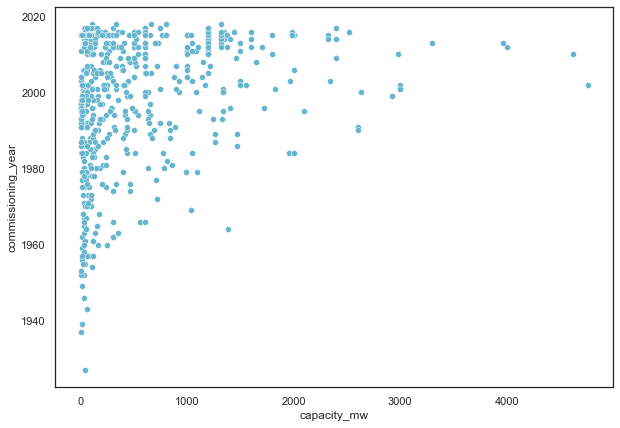

In [227]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='commissioning_year',color='c')
plt.show()        

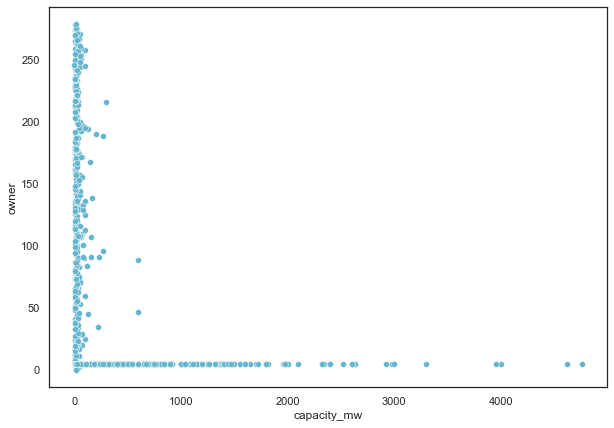

In [228]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='owner',color='c')
plt.show()

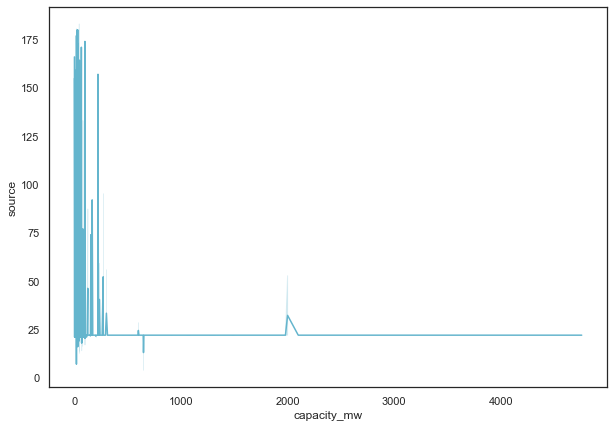

In [230]:
plt.figure(figsize=[10,7])
sns.lineplot(data=powr,x='capacity_mw',y='source',color='c')
plt.show()

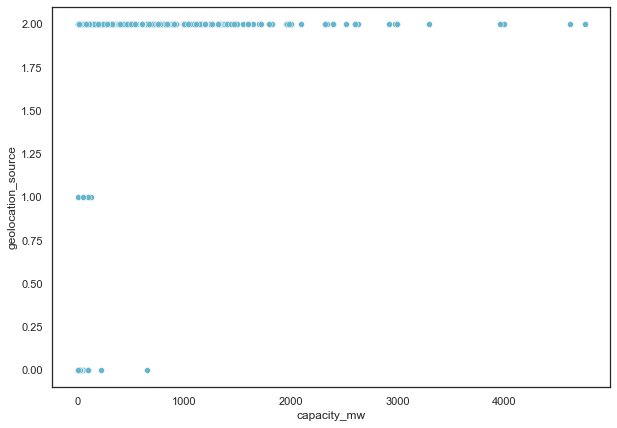

In [232]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='geolocation_source',color='c')
plt.show()

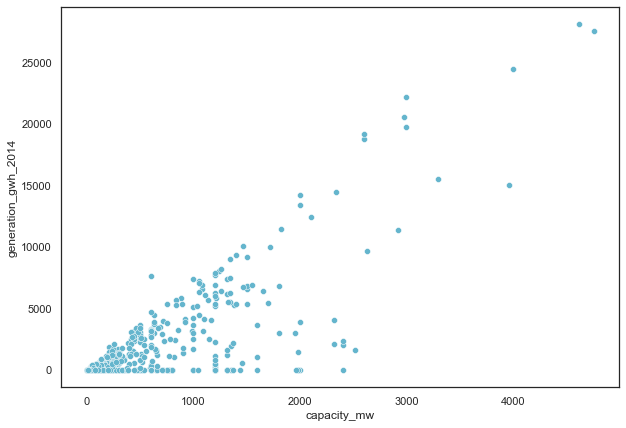

In [233]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='generation_gwh_2014',color='c')
plt.show()

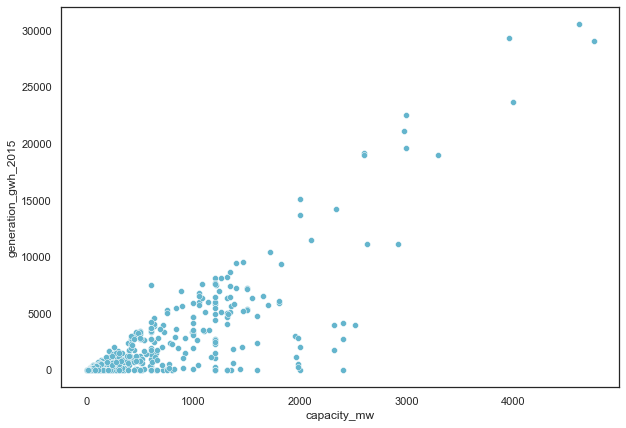

In [235]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='generation_gwh_2015',color='c')
plt.show()

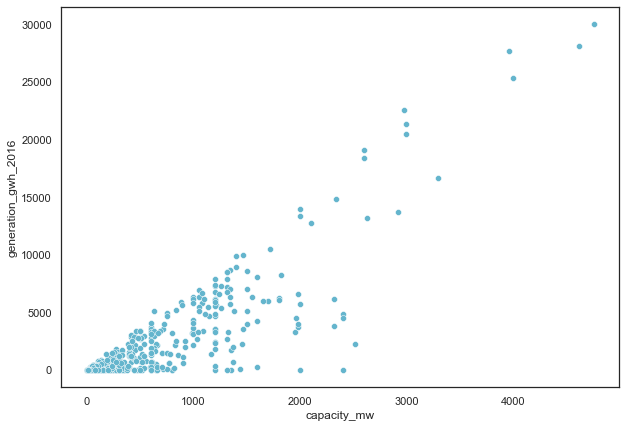

In [236]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='generation_gwh_2016',color='c')
plt.show()

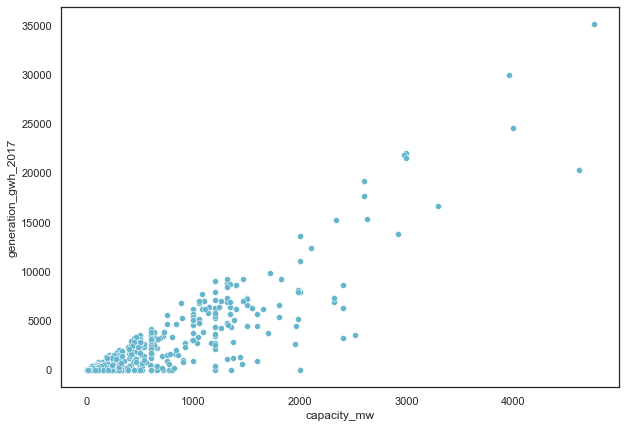

In [237]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='generation_gwh_2017',color='c')
plt.show()

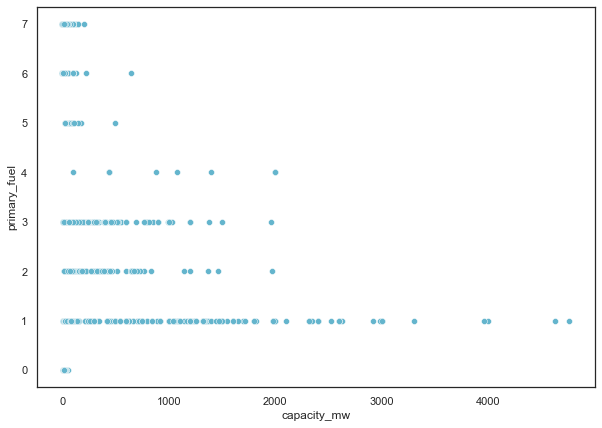

In [238]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=powr,x='capacity_mw',y='primary_fuel',color='c')
plt.show()

## Observation-1

From the above graphs we can say that..

1) The capacity of plant is increasing, with increase in number of years.as we can see the plant capacity is very high in 2020 and 2000 & very low in 1980 and 1960. 

2) The capacity of coal is higher as compare to other fules i.e. more then 4000 mw and the capacity of gas, hydro and nuclear fules is lying in between 0 to 2000 mw.

3) The Acc-Acc limited has the highest capacity as compare to other.

4) Central Electricity Authority has the highest capacity which is more then 4000 mw, In the second position CDM come in the highest capacity source.as compare to others.

5) Capacity is highest in WRI geolocation source which is above 4000 mw as compare to other geolocation sources.

In [239]:
x=powr.iloc[:,1:]
y=powr.iloc[:,0:1]

In [240]:
x

latitude  longitude  other_fuel1  commissioning_year  owner  source  \
0     28.1839    73.2407            2              2011.0    229     109   
1     24.7663    74.6090            2              2015.0    258     174   
2     21.9038    69.3732            2              2015.0      2      21   
3     23.8712    91.3602            2              2004.0      5      22   
4     21.9603    82.4091            2              2015.0      5      22   
..        ...        ...          ...                 ...    ...     ...   
902   16.2949    77.3568            2              2016.0      5      22   
903   12.8932    78.1654            2              2015.0    114      77   
904   15.2758    75.5811            2              2015.0      5      21   
905   24.3500    73.7477            2              2015.0     91      59   
906    9.9344    77.4768            2              2015.0    279      21   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                     1             0.000000             0.000000   
1                     2             0.000000             0.000000   
2                     2             0.000000             0.000000   
3                     2           617.789264           843.747000   
4                     2          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                   2             0.000000             0.994875   
903                   0             0.000000             0.000000   
904                   2             0.000000             0.000000   
905                   2             0.000000             0.000000   
906                   2             0.000000             0.000000   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               0.000000             0.000000             0.000000   
1               0.000000             0.000000             0.000000   
2               0.000000             0.000000             0.000000   
3             886.004428           663.774500           626.239128   
4            6243.000000          5385.579736          7279.000000   
..                   ...                  ...                  ...   
902           233.596650           865.400000           686.500000   
903             0.000000             0.000000             0.000000   
904             0.000000             0.000000             0.000000   
905             0.000000             0.000000             0.000000   
906             0.000000             0.000000             0.000000   

     primary_fuel  
0               6  
1               1  
2               7  
3               2  
4               1  
..            ...  
902             1  
903             6  
904             7  
905             1  
906             7  

[907 rows x 13 columns]

## Removing Outliers

In [241]:
from scipy.stats import zscore

In [242]:
z=np.abs(zscore(x))
z.shape

(907, 13)

In [243]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 158, 179,
       183, 191, 209, 209, 209, 209, 209, 222, 244, 299, 308, 308, 308,
       308, 308, 321, 323, 333, 340, 342, 345, 360, 364, 364, 364, 364,
       364, 371, 416, 427, 444, 454, 478, 482, 484, 493, 493, 493, 493,
       493, 494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 573, 577,
       583, 601, 621, 623, 638, 648, 648, 648, 648, 648, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 706, 709, 721,
       721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726,
       726, 728, 786, 786, 786, 786, 786, 807, 808, 808, 808, 808, 808,
       811, 813, 817, 818, 832, 848, 870, 871, 879, 880, 880, 880, 880,
       880, 895, 900], dtype=int64), array([ 8,  9, 10, 11,  5,  5,  7,  8,  9, 10, 11,  7,  1,  1,  5,  7,  8,
        9, 10, 11,  3,  1,  5,  7,  8,  9, 10, 11,  5,  1,  1,  1,  3,  5,
        1,  7,  8,  9, 10, 11,  3,  1,  1,  3,  3,  3, 11,  3,  7,  8,  9,
       10, 11,  7

In [244]:
x=x[(z<3).all(axis=1)]

In [245]:
y=y[(z<3).all(axis=1)]

In [246]:
x.shape

(837, 13)

In [247]:
y.shape

(837, 1)

In [248]:
data_loss=((907-837)/907)*100
print('Data_loss=',data_loss,'%')

Data_loss= 7.717750826901875 %


Our data loss is 7.7 % which is less then 10%, So we can continue with this.

In [249]:
col=x.columns

## Removing skewness

In [250]:
from sklearn.preprocessing import power_transform

In [251]:
x.skew()

latitude              -0.069372
longitude              0.953666
other_fuel1            0.000000
commissioning_year    -1.522238
owner                  1.327522
source                 1.790332
geolocation_source    -2.110249
generation_gwh_2014    2.741054
generation_gwh_2015    2.549590
generation_gwh_2016    2.484940
generation_gwh_2017    2.399805
generation_gwh_2018    2.439745
primary_fuel           0.422682
dtype: float64

In [252]:
x=power_transform(x)

In [253]:
x=pd.DataFrame(x,columns=col)

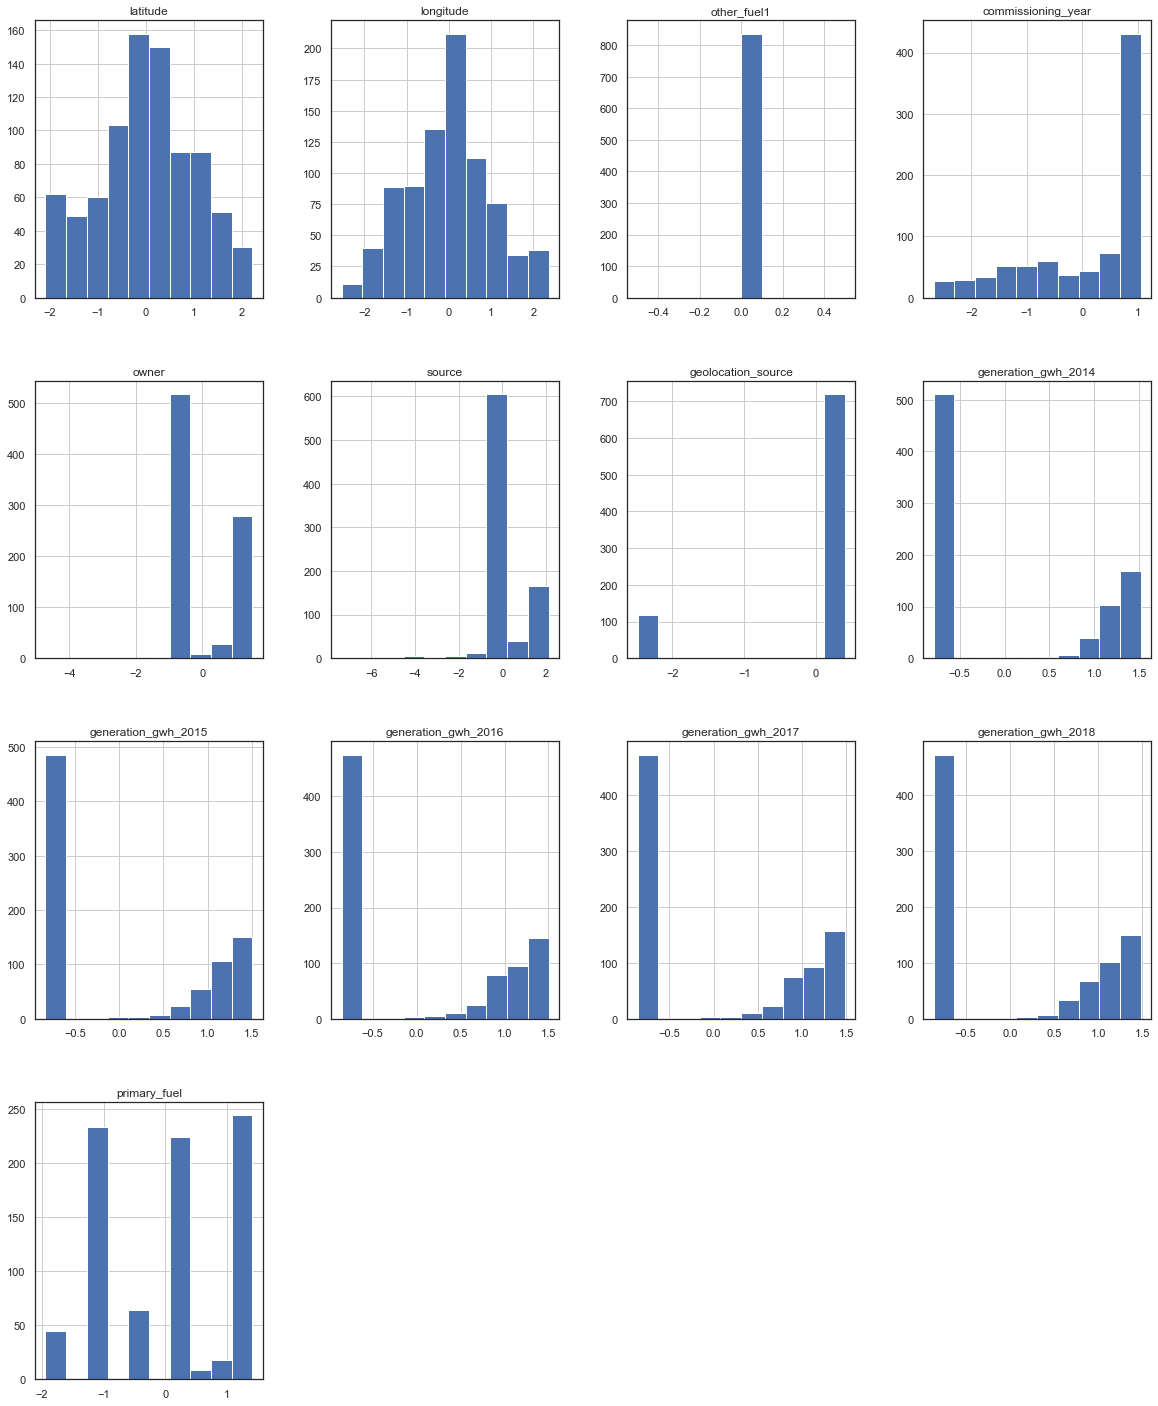

In [254]:
x.hist(figsize=(20,25))
plt.show()

## Adopting Scaling technique using Minmax scaler

In [255]:
from sklearn.preprocessing import MinMaxScaler

In [256]:
mm=MinMaxScaler()

In [257]:
x=mm.fit_transform(x)

In [258]:
x=pd.DataFrame(x,columns=col)

In [259]:
x

latitude  longitude  other_fuel1  commissioning_year     owner    source  \
0    0.755498   0.354726          0.0            0.801436  0.993853  0.948186   
1    0.626319   0.437337          0.0            0.911012  0.997638  0.998264   
2    0.518166   0.065573          0.0            0.911012  0.458218  0.727942   
3    0.592495   0.989289          0.0            0.632181  0.638685  0.735155   
4    0.520300   0.774519          0.0            0.911012  0.638685  0.735155   
..        ...        ...          ...                 ...       ...       ...   
832  0.306383   0.578985          0.0            0.940002  0.638685  0.735155   
833  0.178049   0.615350          0.0            0.911012  0.966458  0.907591   
834  0.267927   0.490892          0.0            0.911012  0.638685  0.727942   
835  0.610588   0.386378          0.0            0.911012  0.955335  0.874429   
836  0.066509   0.584522          0.0            0.911012  1.000000  0.727942   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0               0.06865             0.000000             0.000000   
1               1.00000             0.000000             0.000000   
2               1.00000             0.000000             0.000000   
3               1.00000             0.878169             0.877280   
4               1.00000             0.958483             0.980428   
..                  ...                  ...                  ...   
832             1.00000             0.000000             0.150236   
833             0.00000             0.000000             0.000000   
834             1.00000             0.000000             0.000000   
835             1.00000             0.000000             0.000000   
836             1.00000             0.000000             0.000000   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               0.000000             0.000000             0.000000   
1               0.000000             0.000000             0.000000   
2               0.000000             0.000000             0.000000   
3               0.866298             0.844610             0.833418   
4               0.978567             0.973235             0.984999   
..                   ...                  ...                  ...   
832             0.765299             0.863443             0.840209   
833             0.000000             0.000000             0.000000   
834             0.000000             0.000000             0.000000   
835             0.000000             0.000000             0.000000   
836             0.000000             0.000000             0.000000   

     primary_fuel  
0        0.918488  
1        0.275944  
2        1.000000  
3        0.461707  
4        0.275944  
..            ...  
832      0.275944  
833      0.918488  
834      1.000000  
835      0.275944  
836      1.000000  

[837 rows x 13 columns]

## VIF
### Variance inflation factor

In [260]:
import statsmodels as api
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [261]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [262]:
vif(x)

Variables  VIF Factor
0              latitude    5.789869
1             longitude    9.141967
2           other_fuel1         NaN
3    commissioning_year   13.991734
4                 owner   79.717568
5                source   84.111806
6    geolocation_source    7.258343
7   generation_gwh_2014   12.592035
8   generation_gwh_2015   24.211172
9   generation_gwh_2016   37.746967
10  generation_gwh_2017   60.982818
11  generation_gwh_2018   45.471657
12         primary_fuel    5.103408

Owner and source has high corelation as we can see the VIF factors of owner is 79.71 and source is 84.11. So we will drop the owner column

In [263]:
x.drop(['source'],axis=True,inplace=True)

In [264]:
vif(x)

Variables  VIF Factor
0              latitude    5.426226
1             longitude    8.833761
2           other_fuel1         NaN
3    commissioning_year   13.972736
4                 owner   25.074619
5    geolocation_source    7.108552
6   generation_gwh_2014   12.591172
7   generation_gwh_2015   24.191947
8   generation_gwh_2016   37.701931
9   generation_gwh_2017   60.981348
10  generation_gwh_2018   45.411189
11         primary_fuel    5.081130

as we can see the genration_grh_2017 and genration_grh_2016 both has high vif factor so we will drop genration_grh_2016

In [265]:
x.drop(['other_fuel1'],axis=True,inplace=True)
x.drop(['generation_gwh_2017'],axis=True,inplace=True)

In [266]:
vif(x)

Variables  VIF Factor
0             latitude    5.405687
1            longitude    8.833722
2   commissioning_year   13.967911
3                owner   25.062041
4   geolocation_source    7.107868
5  generation_gwh_2014   12.548962
6  generation_gwh_2015   24.084229
7  generation_gwh_2016   31.028415
8  generation_gwh_2018   17.370453
9         primary_fuel    5.075351

In [267]:
x.drop(['generation_gwh_2016'],axis=True,inplace=True)

In [268]:
vif(x)

Variables  VIF Factor
0             latitude    5.402156
1            longitude    8.833391
2   commissioning_year   13.829394
3                owner   25.004704
4   geolocation_source    7.106901
5  generation_gwh_2014   12.547932
6  generation_gwh_2015   16.314682
7  generation_gwh_2018    9.844135
8         primary_fuel    5.065955

## Model learning phase-prediction phase
### So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target. Here we are going to use Regression model because our target column is numeric in nature.

### For Regression model, Some matrix we are going to find like:

1) R2 score.

2) Mean absolute error.

3) Mean squared error.

4) Root mean squared error.

### Models

1) Decision Tree Regressor

2) KNeighbors Regressor

3) Decision Tree regressor

4) RandomForestRegressor

5) AdaBoostRegressor

6) GradientBoostingRegressor

7) XGboost regresso

In [269]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xg
from sklearn.svm import SVR

In [270]:
def model_select(model):
    max_score=0
    max_state=0
    for p in range(0,150):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=p)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=p
    print("Max score is {} with random state {}".format(max_score,max_state))

## Linear Regression

Finding best random state by calling model_select function

In [370]:
model_select(LinearRegression)

Max score is 0.610197106845681 with random state 68


In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=68)

In [372]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print('Mean_squared error:',mean_squared_error(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean_squared error: 58709.05413637087
Mean absolute error: 170.47779625073477
r2_score: 0.610197106845681
Root mean squared error: 242.299513281333


In [373]:
for i in range(8,20):
    cvs=cross_val_score(LR,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 8 --- 0.5006304334358544
Cross validation score when cv = 9 --- 0.500015229202314
Cross validation score when cv = 10 --- 0.49046113761350363
Cross validation score when cv = 11 --- 0.49662449779027074
Cross validation score when cv = 12 --- 0.5017273159406849
Cross validation score when cv = 13 --- 0.4799538720932741
Cross validation score when cv = 14 --- 0.49754769455532044
Cross validation score when cv = 15 --- 0.48946413970588054
Cross validation score when cv = 16 --- 0.4873133640217534
Cross validation score when cv = 17 --- 0.4913280183723529
Cross validation score when cv = 18 --- 0.46969615009102117
Cross validation score when cv = 19 --- 0.48480557633567944


In [374]:
cvlr=12
Modellr=61
Cslr=50.17
Diffrencelr=61-50.17
Rmse1=242.29
mae1=170.47

## Decision tree regressor

Finding best random state by calling model_select function

In [375]:
model_select(DecisionTreeRegressor)

Max score is 0.8010569947637415 with random state 149


In [376]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=149)

In [377]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.7590318515665084
Mean absoluate error : 120.09378378378378
Means squred error: 51514.43314471351
Root mean squred error:  226.96791214776047


In [378]:
for i in range(3,20):
    cvs=cross_val_score(Dt,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 3 --- 0.6224591410060283
Cross validation score when cv = 4 --- 0.6506195013123564
Cross validation score when cv = 5 --- 0.6200500841396328
Cross validation score when cv = 6 --- 0.5326275920565188
Cross validation score when cv = 7 --- 0.570594802088174
Cross validation score when cv = 8 --- 0.5492640009868224
Cross validation score when cv = 9 --- 0.6043970078040681
Cross validation score when cv = 10 --- 0.5795142029862741
Cross validation score when cv = 11 --- 0.49733497963012446
Cross validation score when cv = 12 --- 0.5924385330655594
Cross validation score when cv = 13 --- 0.5206238940153864
Cross validation score when cv = 14 --- 0.5754808205150426
Cross validation score when cv = 15 --- 0.5441601339675156
Cross validation score when cv = 16 --- 0.5577878075351145
Cross validation score when cv = 17 --- 0.5814604309567306
Cross validation score when cv = 18 --- 0.48238244237683214
Cross validation score when cv = 19 --- 0.5296208302392372


In [379]:
cvdt=4
Modeldt=81.90
Csdt=64.83
Diffrencedt=81.90-64.83
rmse2=191.06
mae2=105.45

## KNeighbor regressor

Finding best random state by calling model_select function

In [380]:
model_select(KNeighborsRegressor)

Max score is 0.7621936490389752 with random state 68


In [381]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=68)

In [382]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.7621936490389752
Mean absolute error: 105.71225837837838
Mean squred error : 35816.52721858184
Root mean squred error: 189.25254877697643


In [383]:
for i in range(4,20):
    cvs=cross_val_score(knn,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 4 --- 0.6143937645687344
Cross validation score when cv = 5 --- 0.6120093923630454
Cross validation score when cv = 6 --- 0.6220056351460909
Cross validation score when cv = 7 --- 0.6097662059508995
Cross validation score when cv = 8 --- 0.6168016216848909
Cross validation score when cv = 9 --- 0.6173998534529326
Cross validation score when cv = 10 --- 0.6143818435557377
Cross validation score when cv = 11 --- 0.622575219728401
Cross validation score when cv = 12 --- 0.6241530084643792
Cross validation score when cv = 13 --- 0.6007498818826877
Cross validation score when cv = 14 --- 0.6085032475394615
Cross validation score when cv = 15 --- 0.604253173777032
Cross validation score when cv = 16 --- 0.6000530636188356
Cross validation score when cv = 17 --- 0.6248646318751289
Cross validation score when cv = 18 --- 0.6096581695565718
Cross validation score when cv = 19 --- 0.5937003038397066


In [427]:
cvknn=4
Modelknn=76.21
Csknn=62.41
Diffrenceknn=76.21-62.41
rmse3=189.25
mae3=105.71

## Support vector machine regressor

Finding best random state by calling model_select function

In [385]:
model_select(SVR)

Max score is 0.06163757770921807 with random state 74


In [386]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=74)

In [387]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.06163757770921807
Mean absolute error 157.99663084436884
Mean squared error: 110088.1490070486
Root mean squared error: 331.7953420514649


In [388]:
for i in range(4,20):
    cvs=cross_val_score(svr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 4 --- -0.0558403051016344
Cross validation score when cv = 5 --- -0.04090484516940394
Cross validation score when cv = 6 --- -0.03819613271661798
Cross validation score when cv = 7 --- -0.037075086199813846
Cross validation score when cv = 8 --- -0.0295393736655217
Cross validation score when cv = 9 --- -0.030295720375844135
Cross validation score when cv = 10 --- -0.021483783495389475
Cross validation score when cv = 11 --- -0.024142089053301185
Cross validation score when cv = 12 --- -0.025327473341939234
Cross validation score when cv = 13 --- -0.020835239583439844
Cross validation score when cv = 14 --- -0.024679990816419188
Cross validation score when cv = 15 --- -0.0206688273341202
Cross validation score when cv = 16 --- -0.025815064011662503
Cross validation score when cv = 17 --- -0.02270883078716803
Cross validation score when cv = 18 --- -0.019576605327268667
Cross validation score when cv = 19 --- -0.008811323807130537


In [428]:
cvsvm= 'Null'
Modelsvm=6.16
cvssvm = '-ve'
Diffrencesvm= '-ve'
rmse4=331.79
mae4=157.99

## RandomForestRegressor

Finding best random state by calling model_select function

In [442]:
model_select(RandomForestRegressor)

Max score is 0.8878432985689807 with random state 60


In [443]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=60)

In [444]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8867437098084914
Mean absolute error 74.32991196289146
Mean squared error: 18984.39771960535
Root mean squared error: 137.78388047810728


In [445]:
for i in range(3,20):
    cvs=cross_val_score(rfr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 3 --- 0.7815968291059628
Cross validation score when cv = 4 --- 0.769261829754167
Cross validation score when cv = 5 --- 0.7769840327459733
Cross validation score when cv = 6 --- 0.7651778183396374
Cross validation score when cv = 7 --- 0.7676607271991422
Cross validation score when cv = 8 --- 0.7662207656473794
Cross validation score when cv = 9 --- 0.7579864266576791
Cross validation score when cv = 10 --- 0.759452434278383
Cross validation score when cv = 11 --- 0.7452715736887975
Cross validation score when cv = 12 --- 0.7771968600688629
Cross validation score when cv = 13 --- 0.7455436829942101
Cross validation score when cv = 14 --- 0.7621716701781615
Cross validation score when cv = 15 --- 0.7629816058619026
Cross validation score when cv = 16 --- 0.7537712774063343
Cross validation score when cv = 17 --- 0.7617160389453668
Cross validation score when cv = 18 --- 0.747649764355972
Cross validation score when cv = 19 --- 0.7698043663000428


In [446]:
cvrfr= 3
Modelrfr=88.67
Csrfr= 78.15
Diffrencerfr= 88.67-78.15
rmse5=137.78
mae5=74

## AdaBoostRegressor

Finding best random state by calling model_select function

In [398]:
model_select(AdaBoostRegressor)

Max score is 0.7611041921795352 with random state 149


In [399]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=149)

In [400]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.7613423402046902
Mean absolute error: 201.77627677658626
Mean squared error: 53019.975274712735
Root mean squared error: 230.26066810185523


In [401]:
for i in range(4,20):
    cvs=cross_val_score(ada,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 4 --- 0.6059963808482277
Cross validation score when cv = 5 --- 0.5840643777695367
Cross validation score when cv = 6 --- 0.5653564397144649
Cross validation score when cv = 7 --- 0.5773794867098848
Cross validation score when cv = 8 --- 0.5173401232099061
Cross validation score when cv = 9 --- 0.5033130218429431
Cross validation score when cv = 10 --- 0.4841788520165493
Cross validation score when cv = 11 --- 0.506685522002115
Cross validation score when cv = 12 --- 0.537190526717915
Cross validation score when cv = 13 --- 0.494717670263099
Cross validation score when cv = 14 --- 0.5367813933907908
Cross validation score when cv = 15 --- 0.5335404787239996
Cross validation score when cv = 16 --- 0.487822166726705
Cross validation score when cv = 17 --- 0.5289679458215945
Cross validation score when cv = 18 --- 0.4763959197817116
Cross validation score when cv = 19 --- 0.45954988756785403


In [402]:
cvada= 4
Modelada=76.13
Csada= 60.59
Diffrenceada=76.13-60.59
rmse6=230.26
mae6=201.77

## GradientBoostingRegressor

Finding best random state by calling model_select function

In [403]:
model_select(GradientBoostingRegressor)

Max score is 0.8780885331031484 with random state 149


In [404]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=149)

In [405]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8769309756854048
Mean absolute error: 96.26326255061133
Mean squared error: 27340.905931279434
Root mean squared error: 165.35085706242782


In [406]:
for i in range(3,15):
    cvs=cross_val_score(gbr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 3 --- 0.7690148221442107
Cross validation score when cv = 4 --- 0.7424436916064401
Cross validation score when cv = 5 --- 0.7552690414215839
Cross validation score when cv = 6 --- 0.7441190381377468
Cross validation score when cv = 7 --- 0.7461769436919345
Cross validation score when cv = 8 --- 0.7357878102704596
Cross validation score when cv = 9 --- 0.7250372780596329
Cross validation score when cv = 10 --- 0.7257936064277376
Cross validation score when cv = 11 --- 0.7141149858615601
Cross validation score when cv = 12 --- 0.7481448728974484
Cross validation score when cv = 13 --- 0.7140194614813674
Cross validation score when cv = 14 --- 0.7360388996599008


In [407]:
cvgbr= 3
Modelgbr=87.69
Csgbr= 76.90
Diffrencegbr=87.69-76.90
rmse7=165.35
mae7=96.26

## Xg Boost regressor

Finding best random state by calling model_select function

In [408]:
model_select(xg.XGBRegressor)

Max score is 0.8859247661840605 with random state 4


In [409]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=4)

In [410]:
XG=xg.XGBRegressor()
XG.fit(x_train,y_train)
pred=XG.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8859247661840605
Mean absolute error: 82.72015708980047
Mean squared error: 23657.977471721963
Root mean squared error: 153.81149980323957


In [411]:
for i in range(4,20):
    cvs=cross_val_score(XG,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 4 --- 0.7427377637298385
Cross validation score when cv = 5 --- 0.740680425986505
Cross validation score when cv = 6 --- 0.7295481286596271
Cross validation score when cv = 7 --- 0.7244539470763545
Cross validation score when cv = 8 --- 0.7285295452790592
Cross validation score when cv = 9 --- 0.7241044383256079
Cross validation score when cv = 10 --- 0.7212134097719881
Cross validation score when cv = 11 --- 0.7123769705275024
Cross validation score when cv = 12 --- 0.7369802970152182
Cross validation score when cv = 13 --- 0.7174320057919608
Cross validation score when cv = 14 --- 0.7215976525613217
Cross validation score when cv = 15 --- 0.7414416736822385
Cross validation score when cv = 16 --- 0.7134754242154996
Cross validation score when cv = 17 --- 0.7253790339655453
Cross validation score when cv = 18 --- 0.7132780843418496
Cross validation score when cv = 19 --- 0.7365653259286299


In [412]:
cvxg=4 
Modelxg=88.59
Csxg= 74.27
Diffrencexg=88.59-74.27
rmse8=153.81
mas8=82.72

## Lasso Regressor:

Finding best random state by calling model_select function

In [413]:
model_select(Lasso)

Max score is 0.6122261542297882 with random state 68


In [414]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=68)

In [415]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
L=GridSearchCV(ls,parameters)
L.fit(x_train,y_train)
print(L.best_params_)

{'alpha': 1, 'random_state': 0}


In [416]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

mselr=cross_val_score(ls,x,y,cv=5)
print('Cross validation of Lasso regressor is',mselr.mean())

R2_score: 0.45817531144690427
Mean Squared error: 98315.05134193302
Mean absolute error: 199.06130040734453
root mean squared error: 313.55231037568996
Cross validation of Lasso regressor is 0.49447980886102316


In [417]:
cvlss=5
Modellss=45.81
Cslss=49.44
Diffrencelss=49.44-45.81
rmse9=313.55
mae9=199.06

## Ridge regressor

Finding best random state by calling model_select function

In [418]:
model_select(Ridge)

Max score is 0.6134601664402806 with random state 68


In [419]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=68)

In [420]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 1, 'solver': 'lsqr'}


In [421]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean squared error ',mean_squared_error(y_test,y_pred))
print('Root mean squared error ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

mserd=cross_val_score(rd,x,y,cv=4)
print('Cross validation of Ridge regressor is',mserd.mean())

Mean squared error  97390.76599685742
Root mean squared error  312.07493650861716
mean absolute error  200.64708984297243
r2 score  0.4632691461384819
Cross validation of Ridge regressor is 0.5041209184438448


In [423]:
cvlsspp=4
Modellsspp=46.32
Cslsspp=50.41
Diffrencelsspp=50.41-46.32
rmse10=312.07
mae10=200.64

In [447]:
kk={'CV':[cvlr,cvknn,cvdt,cvsvm,cvrfr,cvada,cvxg,cvgbr,cvlsspp,cvlss],
                 'Model_accuracy':[Modellr,Modelknn,Modeldt,Modelsvm,Modelrfr,Modelada,Modelxg,Modelgbr,Modellsspp,Modellss],
                 'Cross validation Score':[Cslr,Csknn,Csdt,cvsvm,Csrfr,Csada,Csxg,Csgbr,Cslsspp,Cslss],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencedt,Diffrencesvm,Diffrencerfr,Diffrenceada,Diffrencexg,Diffrencegbr,Diffrencelsspp,Diffrencelss],
    'Root mean squared error':[Rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10],
    'Mean absolute error':[mae1,mae2,mae3,mae4,mae5,mae6,mae7,mas8,mae9,mae10]
 }

In [448]:
result=pd.DataFrame(kk,index=['Linier','kneighbour','Decision tree',
                              'Support vector machine','Random forest','Adaboost','xgboost','Gradientboosting','Ridge','Lasso'])

In [449]:
result

CV  Model_accuracy Cross validation Score Diffrence  \
Linier                    12           61.00                  50.17     10.83   
kneighbour                 4           76.21                  62.41      13.8   
Decision tree              4           81.90                  64.83     17.07   
Support vector machine  Null            6.16                   Null       -ve   
Random forest              3           88.67                  78.15     10.52   
Adaboost                   4           76.13                  60.59     15.54   
xgboost                    4           88.59                  74.27     14.32   
Gradientboosting           3           87.69                   76.9     10.79   
Ridge                      4           46.32                  50.41      4.09   
Lasso                      5           45.81                  49.44      3.63   

                        Root mean squared error  Mean absolute error  
Linier                                   242.29               170.47  
kneighbour                               191.06               105.45  
Decision tree                            189.25               105.71  
Support vector machine                   331.79               157.99  
Random forest                            137.78                74.00  
Adaboost                                 230.26               201.77  
xgboost                                  165.35                96.26  
Gradientboosting                         153.81                82.72  
Ridge                                    313.55               199.06  
Lasso                                    312.07               200.64

##### From the above results we can conclude that the Random forest regressor is giving good r2 score (77.82) and the diffrence between r2 score and cross validation is also very less as compare to others in random forest regresor.

.

## Hyper Parameter tuning
### Grid search cv

In [450]:
parameter ={
       'n_estimators':[15,17,18,19],
      'criterion':['mse','mae'],
     'min_samples_split':[3,5,9],
     "max_features" : ["auto", "sqrt", "log2"]}

In [451]:
GSC=GridSearchCV(rfr,parameter,cv=2)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'mse',
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 15}

In [452]:
GSC.best_estimator_

RandomForestRegressor(criterion='mse', max_features='log2', min_samples_split=3,
                      n_estimators=15)

In [453]:
GSC_pred=GSC.best_estimator_.predict(x_test)
r2_score(y_test,GSC_pred)

0.9022258024303784

In [454]:
rfr_new=RandomForestRegressor(criterion='mse', max_features='log2', min_samples_split=3,
                      n_estimators=15)
rfr_new.fit(x_train,y_train)
predi=rfr_new.predict(x_test)
print("r2 score:",r2_score(y_test,predi))
print("Mean absolute error",mean_absolute_error(y_test,predi))
print("Mean squared error:",mean_squared_error(y_test,predi))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))

r2 score: 0.895267039317851
Mean absolute error 74.47650795338195
Mean squared error: 17555.68875317776
Root mean squared error: 132.49788207053635


### We have done with Hyper parameter tuning.
### Model-Random forest regressor.

# Accuracy-89.52%

In [455]:
import joblib

In [456]:
joblib.dump(rfr_new,'power_plant_2.pkl')

['power_plant_2.pkl']

## Conclusion:

From the above observations we are concluding that

1. we had many null values in data set, So we adopted simple imputer.

2. In order to replace the object data to the int values we used encoading technique.

3. Some columns we dropped, because they was not more contributing to make prediction.

4. In our data set Some skewness and outliers was present, To remove this we used zscore method for outliers removing and power transformation method for skewness removing.

5. For scaling the data set we used standard scaler technique.

6. We used many classifier/Regressor(Based on the problem) for predicting -

like-


A. Linear regression/Logistic regression.

B. k nearest neighbour classifier/k nearest neighbour regressor

c. Design tree classifier/Design tree regressor

D. Support vector machine classifier/Support vector machine regressor

5. In order to control overfitting and underfitting we adopted Cross validation.

6. For Bagging and boosting we have used Random forest classifier,Adaboost classifier and Gradient boosting classifier and xgboost classifier.

7. we worked on Hyper parameter tuning on random forest regressor and random forest classifier for boosting our model accuracy.

Finally we got our best model Which is Random forest regressor(in 2nd case) and also random forest classifier(in 1st case), it gave the 89.52 % accuracy(in regression) and 91.79% accuracy(in classification) Which can be considered as good accuracy.

### Now our model is ready to predict.